## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models.

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

## Exploratory data analysis

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.skew(axis = 0) 

Time      -0.035568
V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64

In [5]:
num = list(df.select_dtypes(include=['float64']).columns)

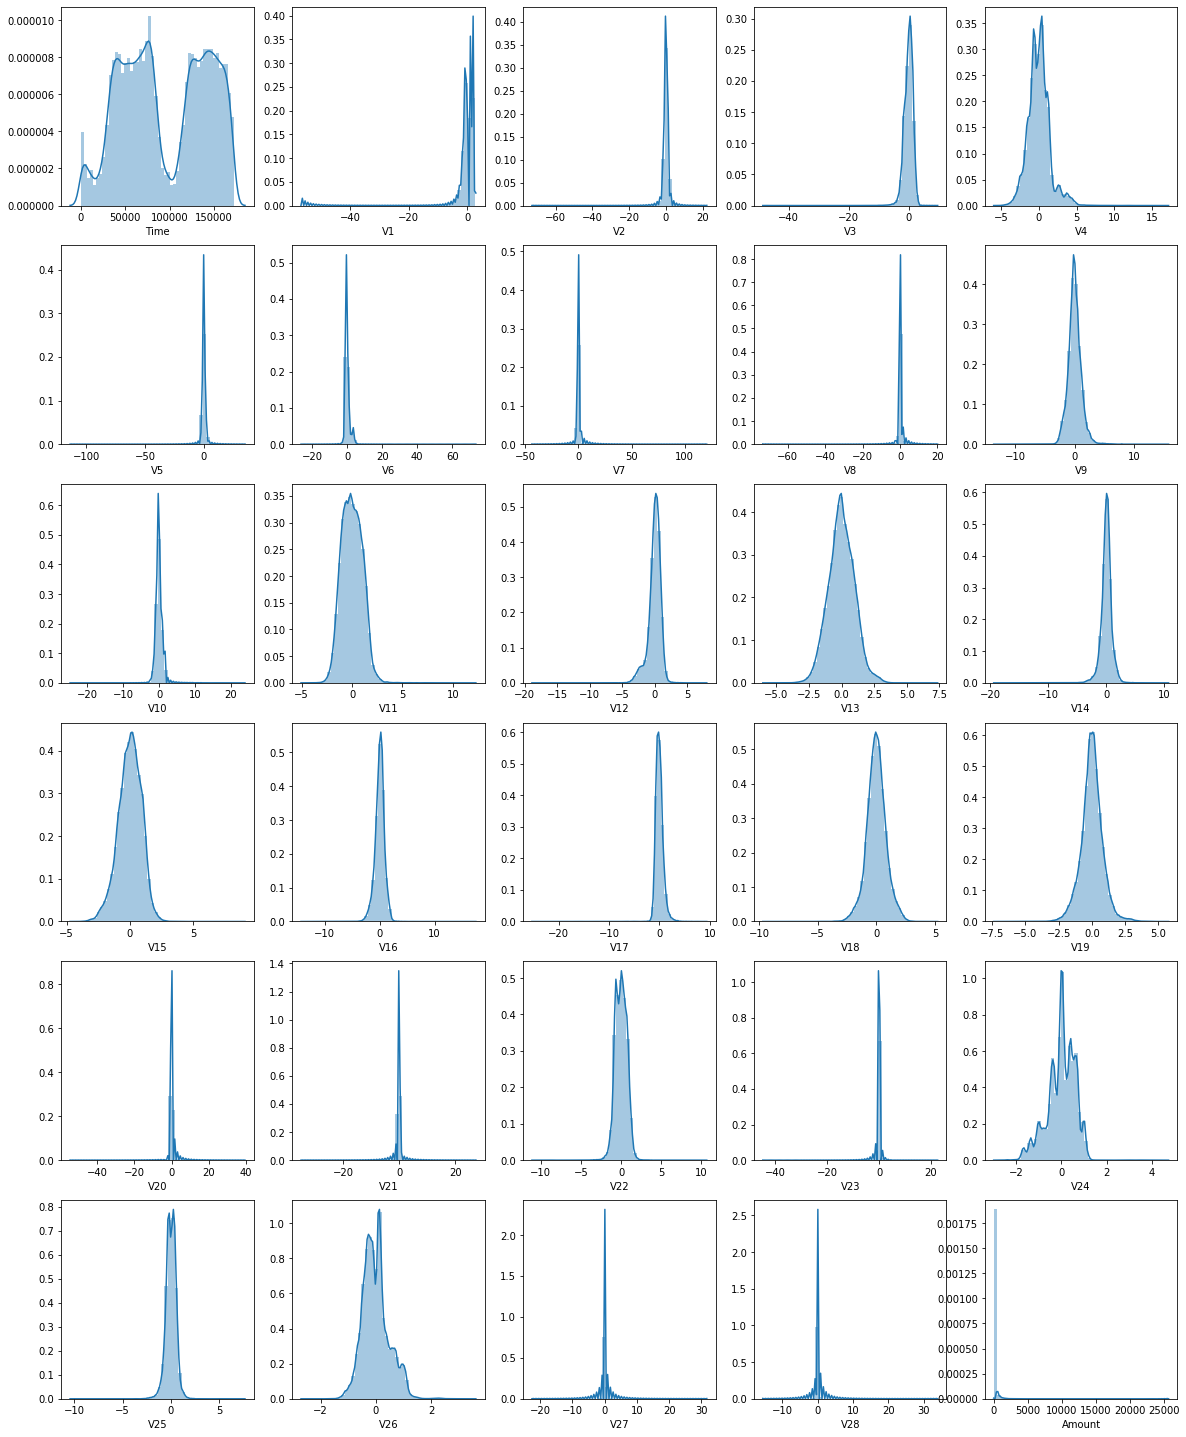

In [6]:
#Using for loop for plotting the density plot of numerical data
plt.figure(figsize=(20,30))
for column in num:
    plt.subplot(7,5,num.index(column)+1)
    #plotting Density plot
    sns.distplot(df[column].dropna())
    
plt.show()

Here we will observe the distribution of our classes

In [7]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

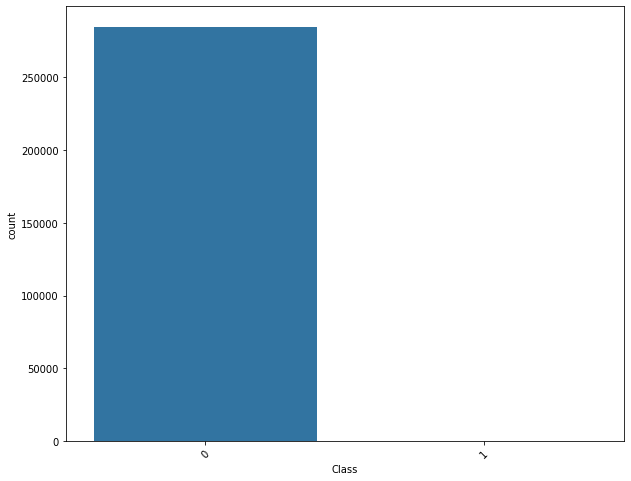

In [8]:
# Create a bar plot for the number of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(10,8))
sns.countplot(x="Class", data=df)
plt.xticks(rotation=45)
plt.show()

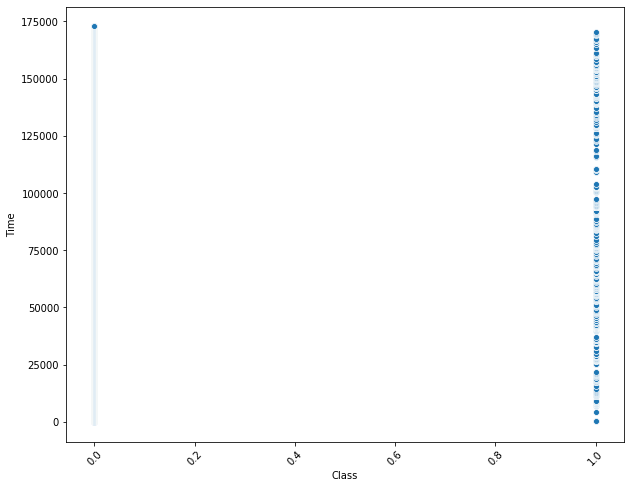

In [9]:
# Create a scatter plot to observe the distribution of classes with time
plt.figure(figsize=(10,8))
sns.scatterplot(x="Class", y="Time", data=df)
plt.xticks(rotation=45)
plt.show()

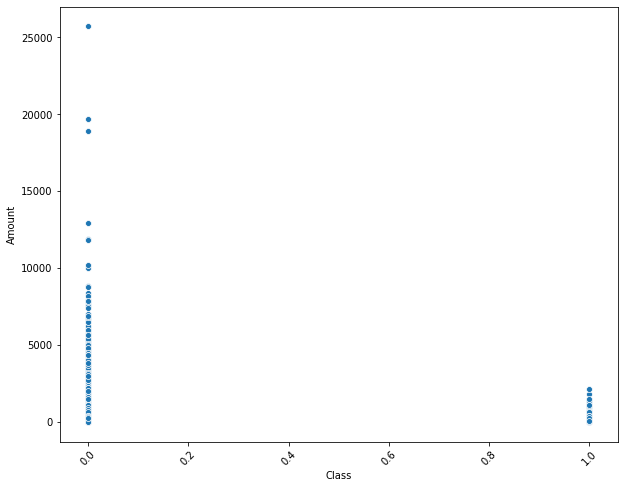

In [10]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.figure(figsize=(10,8))
sns.scatterplot(x="Class", y="Amount", data=df)
plt.xticks(rotation=45)
plt.show()

In [11]:
# Drop unnecessary columns
df.drop("Time", axis=1,inplace= True)

In [12]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### Splitting the data into train & test data

In [13]:
y = df.loc[:, 'Class']
X = df.loc[:, df.columns != 'Class']

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X, y,test_size = 0.3,random_state = 100,stratify=y)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [15]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
344
148


### Plotting the distribution of a variable for skewness

In [16]:
num = list(df.select_dtypes(include=['float64']).columns)

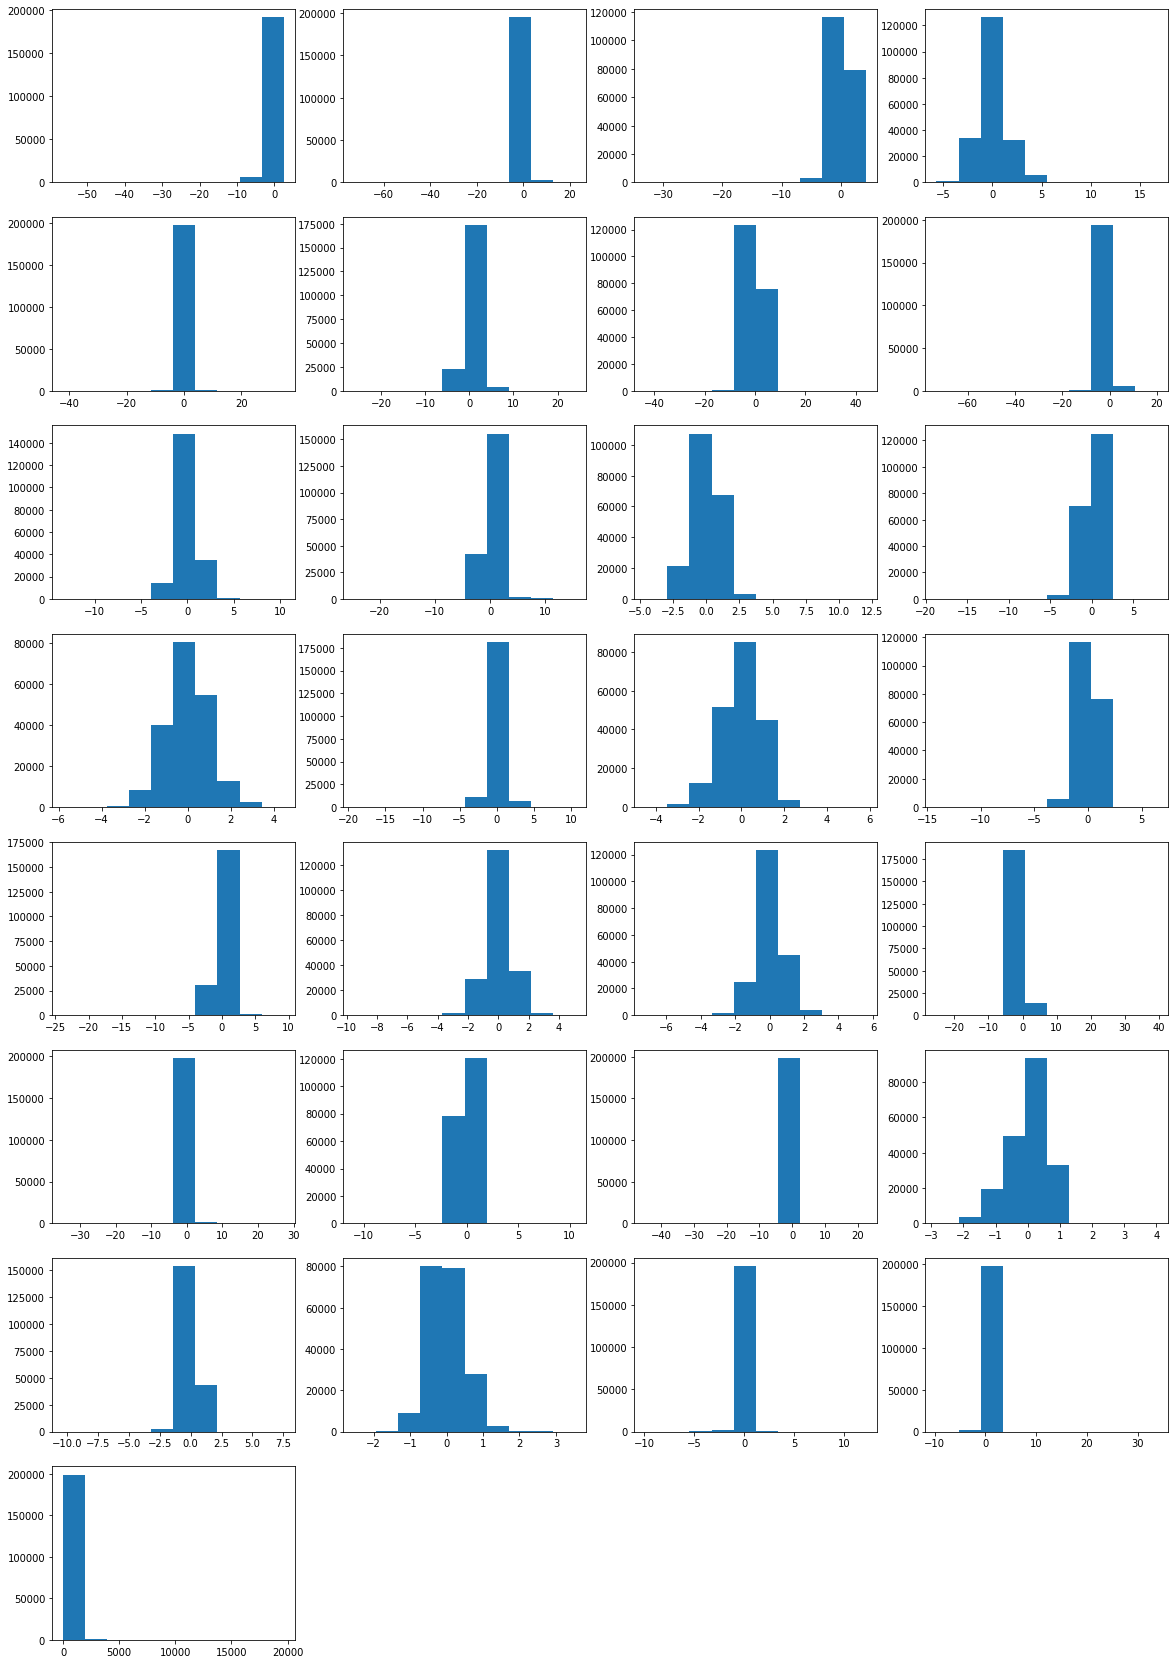

In [17]:
# plot the histogram of a variable from the dataset to see the skewness
plt.figure(figsize=(20,30))
for column in num:
    plt.subplot(8,4,num.index(column)+1)
    #plotting Density plot
    plt.hist(X_train[column].dropna())
    
# plt.show()
plt.show()

<b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [18]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(copy=False)
X_train[num] = pt.fit_transform(X_train[num])
X_test[num] = pt.transform(X_test[num])

In [19]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
222925,1.445692,-0.179859,-0.825371,0.368105,-0.166829,-0.931864,0.056497,-0.301648,0.699190,0.138158,...,-0.414862,-0.395420,-1.068621,0.586820,-0.175555,-0.707411,0.509951,-0.213389,-0.185933,-1.447489
163811,-0.168557,0.707716,-0.415595,-0.340794,0.741497,-0.589994,0.861925,-0.238026,-0.133497,-0.804936,...,0.107737,-0.442209,-1.036617,0.117042,1.000062,-0.756087,0.322004,0.576662,0.282991,-1.130777
196038,1.540551,0.059204,-1.397662,0.027795,0.595882,-1.129044,0.693398,-0.616503,0.062586,0.022332,...,-0.178557,0.225184,0.839662,-0.056913,1.496788,0.975261,0.505386,-0.232174,-0.205412,-0.865022
25173,-0.457140,-0.017893,1.329409,-0.598829,-0.273894,0.055891,-0.130663,0.084501,-1.799416,0.517523,...,0.386509,0.202774,0.281492,-0.035562,-0.067283,-0.652138,-0.549520,0.285317,0.337156,-0.032385
253792,-0.500691,1.306810,-0.833279,0.786730,0.906110,-0.435205,0.910881,0.144093,-0.834615,-0.785152,...,0.029514,0.097412,0.491358,-0.416204,0.814595,0.136860,-0.826228,0.845486,0.693349,-0.689227


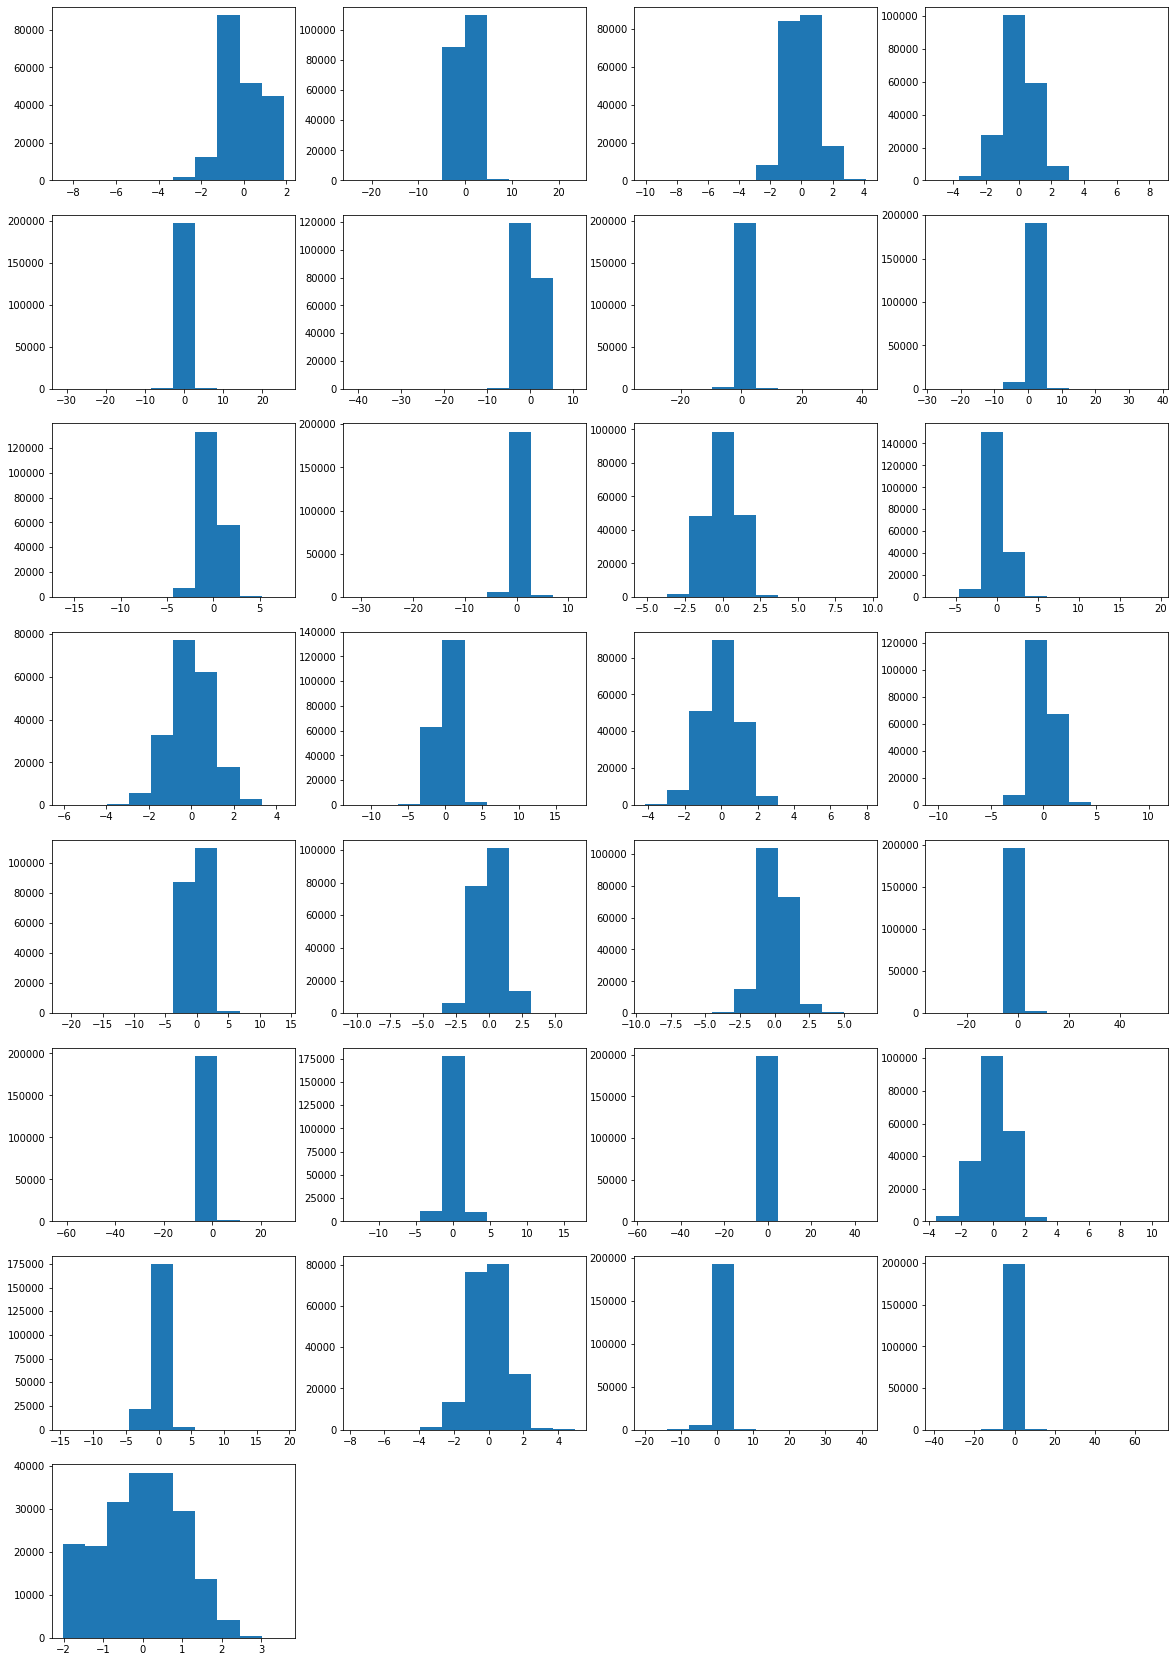

In [20]:
# plot the histogram of a variable from the dataset again to see the result 
plt.figure(figsize=(20,30))
for column in num:
    plt.subplot(8,4,num.index(column)+1)
    #plotting Density plot
    plt.hist(X_train[column])
    
# plt.show()
plt.show()

In [21]:
X_train.skew()

V1       -0.218659
V2        0.348200
V3       -0.079351
V4        0.018358
V5       -0.346900
V6       -1.993752
V7        0.606021
V8        2.389016
V9       -0.060698
V10      -1.356770
V11       0.057088
V12       0.165318
V13       0.005926
V14       0.108003
V15       0.009912
V16       0.027145
V17      -0.825831
V18      -0.057166
V19       0.016302
V20      -0.481587
V21      -2.081382
V22      -0.019893
V23      -0.020900
V24       0.123275
V25       0.082718
V26      -0.023450
V27       1.326715
V28       1.207900
Amount    0.017888
dtype: float64

## Model Building
- Build different models on the imbalanced dataset and see the result

## Logestic regression

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [23]:
# create pipeline
steps = [("logistic", LogisticRegression())]
pipeline = Pipeline(steps)

In [24]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.9992927509480147

In [25]:
# Creating a dict for auc score of train and test data
auc_score_train = {}
auc_score_test = {}

In [26]:
# predict train data
y_train_pred = pipeline.predict(X_train)

# create confusion matrix
lm_train_cm = confusion_matrix(y_train, y_train_pred)
print(lm_train_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train, y_train_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_train_pred_prob = pipeline.predict_proba(X_train)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_train, y_train_pred_prob),2))
auc_score_train.update({'Logestic' : round(roc_auc_score(y_train, y_train_pred_prob),2)})
print(classification_report(y_train,y_train_pred))

[[198991     29]
 [   112    232]]
Sensitivity: 	0.67
Specificity: 	1.0
AUC:    	 0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.89      0.67      0.77       344

    accuracy                           1.00    199364
   macro avg       0.94      0.84      0.88    199364
weighted avg       1.00      1.00      1.00    199364



In [27]:
# predict on test data
y_pred = pipeline.predict(X_test)

# create confusion matrix
lm_test_cm = confusion_matrix(y_test, y_pred)
print(lm_test_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))
auc_score_test.update({'Logestic' : round(roc_auc_score(y_test, y_pred_prob),2)})
print(classification_report(y_test,y_pred))

[[85277    18]
 [   56    92]]
Sensitivity: 	0.62
Specificity: 	1.0
AUC:    	 0.97
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.84      0.62      0.71       148

    accuracy                           1.00     85443
   macro avg       0.92      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



## Hyperparameter tunning

In [28]:
# logistic regression 
logistic = LogisticRegression()

# create pipeline
steps = [("logistic", logistic)]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': np.linspace(0.001,0.02,10), 'logistic__penalty': ['l1', 'l2'], 'logistic__solver' : ['lbfgs','saga']}

# create 3 folds
folds = StratifiedKFold(n_splits = 3, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc')

In [29]:
# fit model
model.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=False),
             estimator=Pipeline(steps=[('logistic', LogisticRegression())]),
             param_grid={'logistic__C': array([0.001     , 0.00311111, 0.00522222, 0.00733333, 0.00944444,
       0.01155556, 0.01366667, 0.01577778, 0.01788889, 0.02      ]),
                         'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['lbfgs', 'saga']},
             scoring='roc_auc')

In [30]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9789394459242354
Best hyperparameters:  {'logistic__C': 0.011555555555555555, 'logistic__penalty': 'l2', 'logistic__solver': 'saga'}


In [31]:
# predict on train data
y_train_pred = model.predict(X_train)

# create confusion matrix
lm_train_tune_cm = confusion_matrix(y_train, y_train_pred)
print(lm_train_tune_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train, y_train_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_train_pred_prob = model.predict_proba(X_train)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_train, y_train_pred_prob),2))
auc_score_train.update({'Logestic_tune' : round(roc_auc_score(y_train, y_train_pred_prob),2)})
print(classification_report(y_train,y_train_pred))

[[198997     23]
 [   120    224]]
Sensitivity: 	0.65
Specificity: 	1.0
AUC:    	 0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.91      0.65      0.76       344

    accuracy                           1.00    199364
   macro avg       0.95      0.83      0.88    199364
weighted avg       1.00      1.00      1.00    199364



In [32]:
# predict on test data
y_pred = model.predict(X_test)

# create confusion matrix
lm_test_tune_cm = confusion_matrix(y_test, y_pred)
print(lm_test_tune_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))
auc_score_test.update({'Logestic_tune' : round(roc_auc_score(y_test, y_pred_prob),2)})
print(classification_report(y_test,y_pred))

[[85280    15]
 [   62    86]]
Sensitivity: 	0.58
Specificity: 	1.0
AUC:    	 0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.85      0.58      0.69       148

    accuracy                           1.00     85443
   macro avg       0.93      0.79      0.85     85443
weighted avg       1.00      1.00      1.00     85443



### Similarly explore other algorithms by building models like:
- KNN
- Decision Tree
- Random Forest
- XGBoost

## KNN

In [38]:
knn = KNeighborsClassifier()  
# Train the model using the training sets 
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [39]:
# predict on train data
y_train_pred = knn.predict(X_train)

# create confusion matrix
knn_train_cm = confusion_matrix(y_train, y_train_pred)
print(knn_train_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train, y_train_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_train_pred_prob = knn.predict_proba(X_train)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_train, y_train_pred_prob),2))
auc_score_train.update({'Knn' : round(roc_auc_score(y_train, y_train_pred_prob),2)})
print(classification_report(y_train,y_train_pred))

[[199005     15]
 [    75    269]]
Sensitivity: 	0.78
Specificity: 	1.0
AUC:    	 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.95      0.78      0.86       344

    accuracy                           1.00    199364
   macro avg       0.97      0.89      0.93    199364
weighted avg       1.00      1.00      1.00    199364



In [40]:
# predict on test data
y_pred = knn.predict(X_test)

# create onfusion matrix
knn_test_cm = confusion_matrix(y_test, y_pred)
print(knn_test_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = knn.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))
auc_score_test.update({'Knn' : round(roc_auc_score(y_test, y_pred_prob),2)})
print(classification_report(y_test,y_pred))

[[85282    13]
 [   37   111]]
Sensitivity: 	0.75
Specificity: 	1.0
AUC:    	 0.92
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.90      0.75      0.82       148

    accuracy                           1.00     85443
   macro avg       0.95      0.87      0.91     85443
weighted avg       1.00      1.00      1.00     85443



In [60]:
# Create the parameter grid 
param_grid = {
    'leaf_size' : range(1,50,10),
    'n_neighbors' : range(1,10,2),
    'p': [1,2]
}

n_folds = StratifiedKFold(n_splits = 3, random_state = 4)

# Instantiate the random search model
knn = KNeighborsClassifier() 
rand_search = RandomizedSearchCV(estimator = knn, param_distributions = param_grid, 
                          cv = n_folds, n_jobs = -1, verbose = 1, scoring='roc_auc', random_state = 100)

# Fit the grid search to the data
rand_search.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 90.3min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=False),
                   estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'leaf_size': range(1, 50, 10),
                                        'n_neighbors': range(1, 10, 2),
                                        'p': [1, 2]},
                   random_state=100, scoring='roc_auc', verbose=1)

In [61]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", rand_search.best_score_)
print(rand_search.best_estimator_)

best accuracy 0.9299927211988629
KNeighborsClassifier(leaf_size=41, n_neighbors=9)


In [41]:
# model with optimal hyperparameters
knn_tune = KNeighborsClassifier(leaf_size = 41,n_neighbors = 9)
knn_tune.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=41, n_neighbors=9)

In [42]:
# predict on train data
y_train_pred = knn_tune.predict(X_train)

# create confusion matrix
knn_tune_train_cm = confusion_matrix(y_train, y_train_pred)
print(knn_tune_train_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train, y_train_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_train_pred_prob = knn_tune.predict_proba(X_train)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_train, y_train_pred_prob),2))
auc_score_train.update({'Knn_tune' : round(roc_auc_score(y_train, y_train_pred_prob),2)})
print(classification_report(y_train,y_train_pred))

[[199002     18]
 [    86    258]]
Sensitivity: 	0.75
Specificity: 	1.0
AUC:    	 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.93      0.75      0.83       344

    accuracy                           1.00    199364
   macro avg       0.97      0.87      0.92    199364
weighted avg       1.00      1.00      1.00    199364



In [43]:
# accuracy score
knn_tune.score(X_test,y_test)

0.9992626663389628

In [44]:
# predict on test data
y_pred = knn_tune.predict(X_test)

# create confusion matrix
knn_tune_test_cm = confusion_matrix(y_test, y_pred)
print(knn_tune_test_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = knn_tune.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))
auc_score_test.update({'Knn_tune' : round(roc_auc_score(y_test, y_pred_prob),2)})
print(classification_report(y_test,y_pred))

[[85280    15]
 [   48   100]]
Sensitivity: 	0.68
Specificity: 	1.0
AUC:    	 0.93
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.87      0.68      0.76       148

    accuracy                           1.00     85443
   macro avg       0.93      0.84      0.88     85443
weighted avg       1.00      1.00      1.00     85443



## Decision tree

In [33]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [34]:
# predict on train data
y_train_pred = dt.predict(X_train)

# create confusion matrix
dt_train_cm = confusion_matrix(y_train, y_train_pred)
print(dt_train_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train, y_train_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_train_pred_prob = dt.predict_proba(X_train)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_train, y_train_pred_prob),2))
auc_score_train.update({'Decision_tree' : round(roc_auc_score(y_train, y_train_pred_prob),2)})
print(classification_report(y_train,y_train_pred))

[[199009     11]
 [    59    285]]
Sensitivity: 	0.83
Specificity: 	1.0
AUC:    	 0.92
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.96      0.83      0.89       344

    accuracy                           1.00    199364
   macro avg       0.98      0.91      0.95    199364
weighted avg       1.00      1.00      1.00    199364



In [35]:
# predict on test data
y_pred = dt.predict(X_test)

# create confusion matrix
dt_test_cm = confusion_matrix(y_test, y_pred)
print(dt_test_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = dt.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))
auc_score_test.update({'Decision_tree' : round(roc_auc_score(y_test, y_pred_prob),2)})
print(classification_report(y_test,y_pred))

[[85277    18]
 [   36   112]]
Sensitivity: 	0.76
Specificity: 	1.0
AUC:    	 0.87
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.86      0.76      0.81       148

    accuracy                           1.00     85443
   macro avg       0.93      0.88      0.90     85443
weighted avg       1.00      1.00      1.00     85443



## Hyperparameter tuning

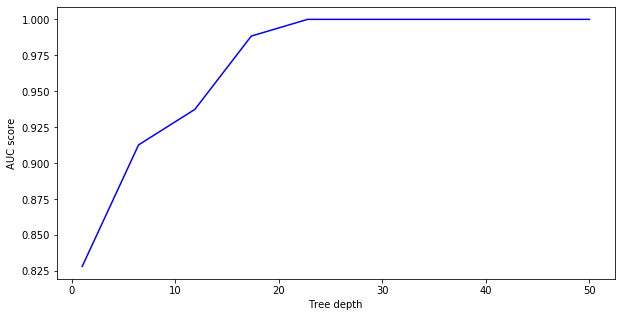

In [48]:
from sklearn.metrics import roc_curve, auc
plt.rcParams['figure.figsize'] = [10, 5]
max_depths = np.linspace(1, 50, 10, endpoint=True)
train_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

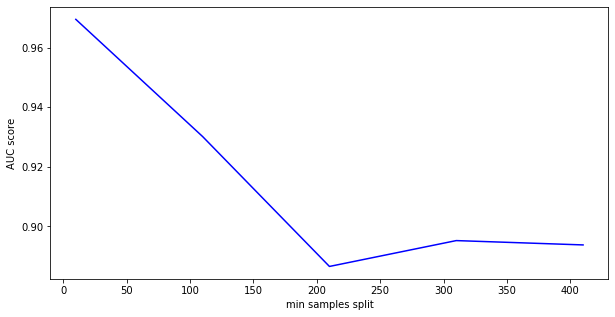

In [49]:
min_samples_splits = list(range(10, 500, 100))
train_results = []
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

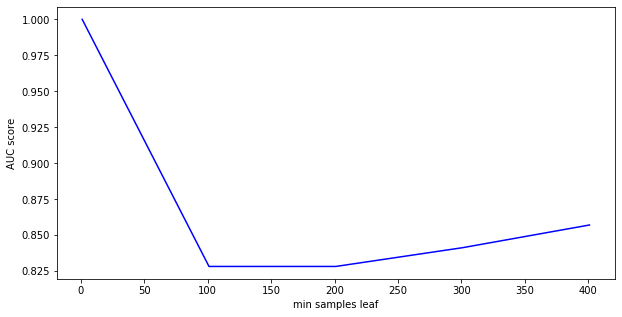

In [50]:
min_samples_leafs = list(range(1, 500, 100))
train_results = []
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

In [51]:
# Create the parameter grid 
param_grid = {
    'max_depth': list(range(1, 50, 10)),
    'min_samples_leaf': list(range(1, 100, 100)),
    'min_samples_split': list(range(2, 50, 10)),
    'criterion': ["entropy", "gini"]
}

n_folds = StratifiedKFold(n_splits = 3, random_state = 4)

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
rand_search = RandomizedSearchCV(estimator = dtree, param_distributions = param_grid, 
                          cv = n_folds, n_jobs = -1, verbose = 1, scoring='roc_auc', random_state = 100)

# Fit the grid search to the data
rand_search.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.6min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=False),
                   estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [1, 11, 21, 31, 41],
                                        'min_samples_leaf': [1],
                                        'min_samples_split': [2, 12, 22, 32,
                                                              42]},
                   random_state=100, scoring='roc_auc', verbose=1)

In [52]:
# cv results
cv_results = pd.DataFrame(rand_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,19.084344,2.196910,0.116235,0.010380,12,1,11,entropy,"{'min_samples_split': 12, 'min_samples_leaf': ...",0.886031,0.912450,0.875591,0.891357,0.015512,6
1,28.911315,3.130624,0.072007,0.001120,12,1,21,gini,"{'min_samples_split': 12, 'min_samples_leaf': ...",0.886772,0.912753,0.872663,0.890729,0.016604,7
2,25.385326,1.594447,0.063907,0.008687,22,1,21,gini,"{'min_samples_split': 22, 'min_samples_leaf': ...",0.895425,0.921404,0.894503,0.903777,0.012469,4
3,2.272287,0.045693,0.073870,0.015795,32,1,1,gini,"{'min_samples_split': 32, 'min_samples_leaf': ...",0.843380,0.808515,0.841924,0.831273,0.016104,10
4,27.923830,3.416701,0.085056,0.016004,32,1,31,gini,"{'min_samples_split': 32, 'min_samples_leaf': ...",0.904116,0.925750,0.894472,0.908112,0.013078,2
5,27.923813,2.324239,0.079521,0.022791,42,1,41,gini,"{'min_samples_split': 42, 'min_samples_leaf': ...",0.904077,0.917018,0.903205,0.908100,0.006316,3
6,18.540660,0.486811,0.056050,0.006186,2,1,11,entropy,"{'min_samples_split': 2, 'min_samples_leaf': 1...",0.899186,0.894973,0.871052,0.888404,0.012389,8
7,18.178145,1.079922,0.070293,0.012563,32,1,11,gini,"{'min_samples_split': 32, 'min_samples_leaf': ...",0.916799,0.910009,0.963346,0.930051,0.023706,1
8,18.873007,0.488906,0.051159,0.007870,2,1,41,entropy,"{'min_samples_split': 2, 'min_samples_leaf': 1...",0.891056,0.895305,0.859468,0.881943,0.015987,9
9,22.401434,2.335978,0.051481,0.002738,22,1,31,gini,"{'min_samples_split': 22, 'min_samples_leaf': ...",0.895425,0.925759,0.885753,0.902312,0.017043,5


In [53]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", rand_search.best_score_)
print(rand_search.best_estimator_)

best accuracy 0.9300511369171948
DecisionTreeClassifier(max_depth=11, min_samples_split=32)


In [36]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion='entropy',
                                  random_state = 100,
                                  max_depth=11, 
                                  min_samples_split=32)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_split=32,
                       random_state=100)

In [37]:
# predict on train data
y_train_pred = clf_gini.predict(X_train)

# create confusion matrix
dt_train_tune_cm = confusion_matrix(y_train, y_train_pred)
print(dt_train_tune_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train, y_train_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_train_pred_prob = clf_gini.predict_proba(X_train)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_train, y_train_pred_prob),2))
auc_score_train.update({'Decision_tree_tune' : round(roc_auc_score(y_train, y_train_pred_prob),2)})
print(classification_report(y_train,y_train_pred))

[[199004     16]
 [    51    293]]
Sensitivity: 	0.85
Specificity: 	1.0
AUC:    	 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.95      0.85      0.90       344

    accuracy                           1.00    199364
   macro avg       0.97      0.93      0.95    199364
weighted avg       1.00      1.00      1.00    199364



In [38]:
# accuracy score
clf_gini.score(X_test,y_test)

0.9993328885923949

In [39]:
# predict on test data
y_pred = clf_gini.predict(X_test)

# create onfusion matrix
dt_test_tune_cm = confusion_matrix(y_test, y_pred)
print(dt_test_tune_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = clf_gini.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))
auc_score_test.update({'Decision_tree_tune' : round(roc_auc_score(y_test, y_pred_prob),2)})
print(classification_report(y_test, y_pred))

[[85275    20]
 [   37   111]]
Sensitivity: 	0.75
Specificity: 	1.0
AUC:    	 0.92
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.85      0.75      0.80       148

    accuracy                           1.00     85443
   macro avg       0.92      0.87      0.90     85443
weighted avg       1.00      1.00      1.00     85443



## Top features

Top var = 17
2nd Top var = 14
3rd Top var = 10


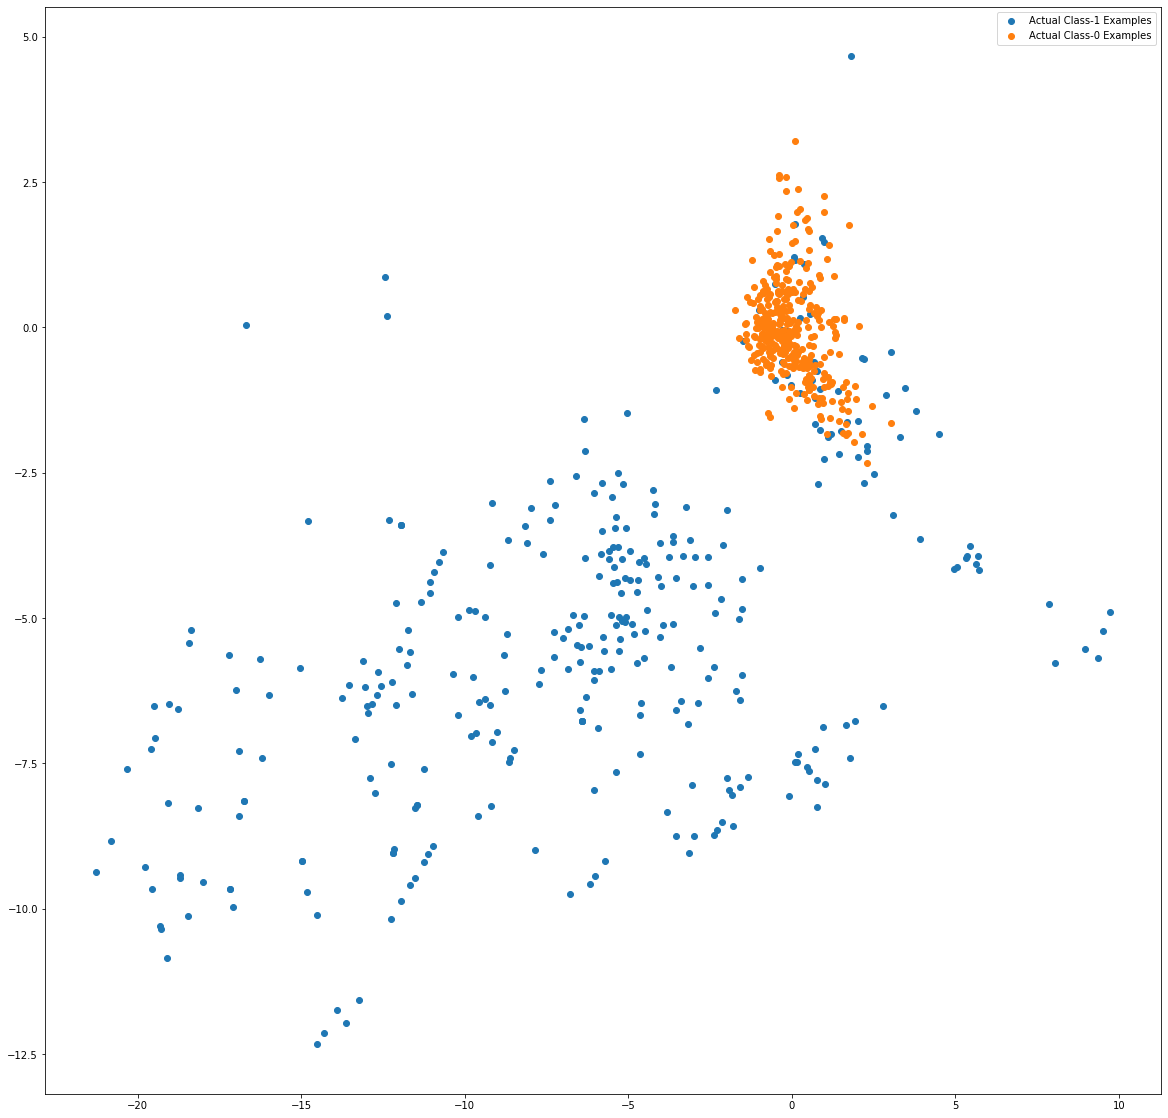

In [40]:
var_imp = []
for i in clf_gini.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf_gini.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf_gini.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf_gini.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf_gini.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf_gini.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Random Forest

In [41]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [42]:
# fit model
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [43]:
# predict on train data
y_train_pred = rfc.predict(X_train)

# create confusion matrix
rfc_train_cm = confusion_matrix(y_train, y_train_pred)
print(rfc_train_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train, y_train_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_train_pred_prob = rfc.predict_proba(X_train)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_train, y_train_pred_prob),2))
auc_score_train.update({'Random_forest' : round(roc_auc_score(y_train, y_train_pred_prob),2)})
print(classification_report(y_train,y_train_pred))

[[199020      0]
 [     0    344]]
Sensitivity: 	1.0
Specificity: 	1.0
AUC:    	 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00       344

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364



In [44]:
# predict on test data
y_pred = rfc.predict(X_test)

# create confusion matrix
rfc_test_cm = confusion_matrix(y_test, y_pred)
print(rfc_test_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rfc.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))
auc_score_test.update({'Random_forest' : round(roc_auc_score(y_test, y_pred_prob),2)})
print(classification_report(y_test,y_pred))

[[85287     8]
 [   37   111]]
Sensitivity: 	0.75
Specificity: 	1.0
AUC:    	 0.94
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.93      0.75      0.83       148

    accuracy                           1.00     85443
   macro avg       0.97      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443



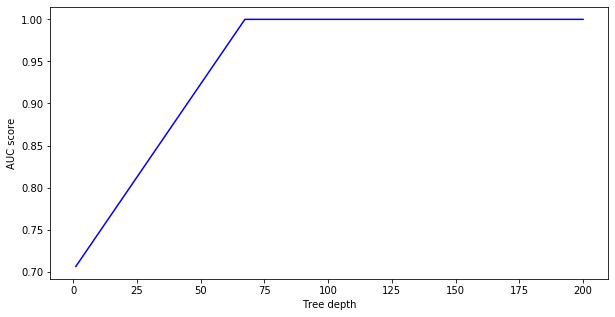

In [63]:
from sklearn.metrics import roc_curve, auc
plt.rcParams['figure.figsize'] = [10, 5]
max_depths = np.linspace(1, 200, 4, endpoint=True)
train_results = []
for max_depth in max_depths:
    rfc = RandomForestClassifier(max_depth=max_depth)
    rfc.fit(X_train, y_train)
    train_pred = rfc.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

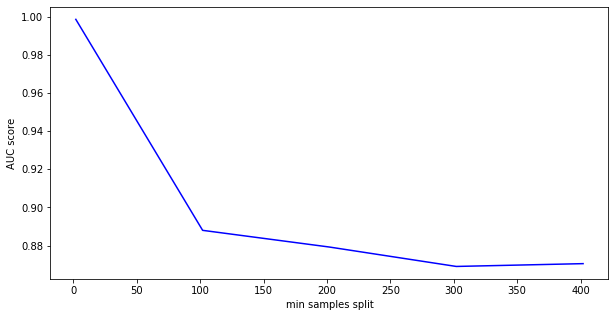

In [64]:
min_samples_splits = list(range(2, 500, 100))
train_results = []
for min_samples_split in min_samples_splits:
    rfc = RandomForestClassifier(min_samples_split=min_samples_split)
    rfc.fit(X_train, y_train)
    train_pred = rfc.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

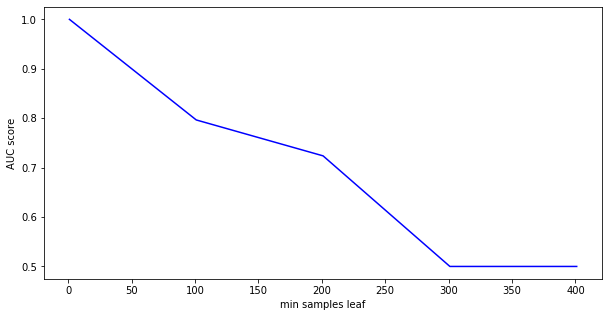

In [65]:
min_samples_leafs = list(range(1, 500, 100))
train_results = []
for min_samples_leaf in min_samples_leafs:
    rfc = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
    rfc.fit(X_train, y_train)
    train_pred = rfc.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

In [44]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': list(range(1, 100, 20)),
    'min_samples_leaf': list(range(1, 100, 20)),
    'min_samples_split': list(range(1, 100, 20)),
    'n_estimators': list(range(10, 500, 100)), 
    'max_features': [20, 23, 25, 29]
}

n_folds = StratifiedKFold(n_splits = 3, random_state = 4)

# Create a based model
rf = RandomForestClassifier()
# Instantiate the random search model
rand_search = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                          cv = n_folds, n_jobs = -1, verbose = 1, scoring='roc_auc', random_state = 100)
# Fit the grid search to the data
rand_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 70.5min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=False),
                   estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [1, 21, 41, 61, 81],
                                        'max_features': [20, 23, 25, 29],
                                        'min_samples_leaf': [1, 21, 41, 61, 81],
                                        'min_samples_split': [1, 21, 41, 61,
                                                              81],
                                        'n_estimators': [10, 110, 210, 310,
                                                         410]},
                   random_state=100, scoring='roc_auc', verbose=1)

In [45]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',rand_search.best_score_,'using',rand_search.best_params_)

We can get accuracy of 0.972820033265978 using {'n_estimators': 410, 'min_samples_split': 21, 'min_samples_leaf': 81, 'max_features': 25, 'max_depth': 61}


In [45]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=61,
                             min_samples_leaf=81, 
                             min_samples_split=21,
                             max_features=25,
                             n_estimators=410)

In [46]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=61, max_features=25, min_samples_leaf=81,
                       min_samples_split=21, n_estimators=410)

In [47]:
# predict on train data
y_train_pred = rfc.predict(X_train)

# create confusion matrix
rfc_train_tune_cm = confusion_matrix(y_train, y_train_pred)
print(rfc_train_tune_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train, y_train_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_train_pred_prob = rfc.predict_proba(X_train)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_train, y_train_pred_prob),2))
auc_score_train.update({'Random_forest_tune' : round(roc_auc_score(y_train, y_train_pred_prob),2)})
print(classification_report(y_train,y_train_pred))

[[198971     49]
 [   114    230]]
Sensitivity: 	0.67
Specificity: 	1.0
AUC:    	 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.82      0.67      0.74       344

    accuracy                           1.00    199364
   macro avg       0.91      0.83      0.87    199364
weighted avg       1.00      1.00      1.00    199364



In [48]:
# predict on test data
y_pred = rfc.predict(X_test)

# create confusion matrix
rfc_test_tune_cm = confusion_matrix(y_test, y_pred)
print(rfc_test_tune_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rfc.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))
auc_score_test.update({'Random_forest_tune' : round(roc_auc_score(y_test, y_pred_prob),2)})
print(classification_report(y_test,y_pred))

[[85259    36]
 [   51    97]]
Sensitivity: 	0.66
Specificity: 	1.0
AUC:    	 0.96
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.73      0.66      0.69       148

    accuracy                           1.00     85443
   macro avg       0.86      0.83      0.84     85443
weighted avg       1.00      1.00      1.00     85443



Top var = 17
2nd Top var = 12
3rd Top var = 14


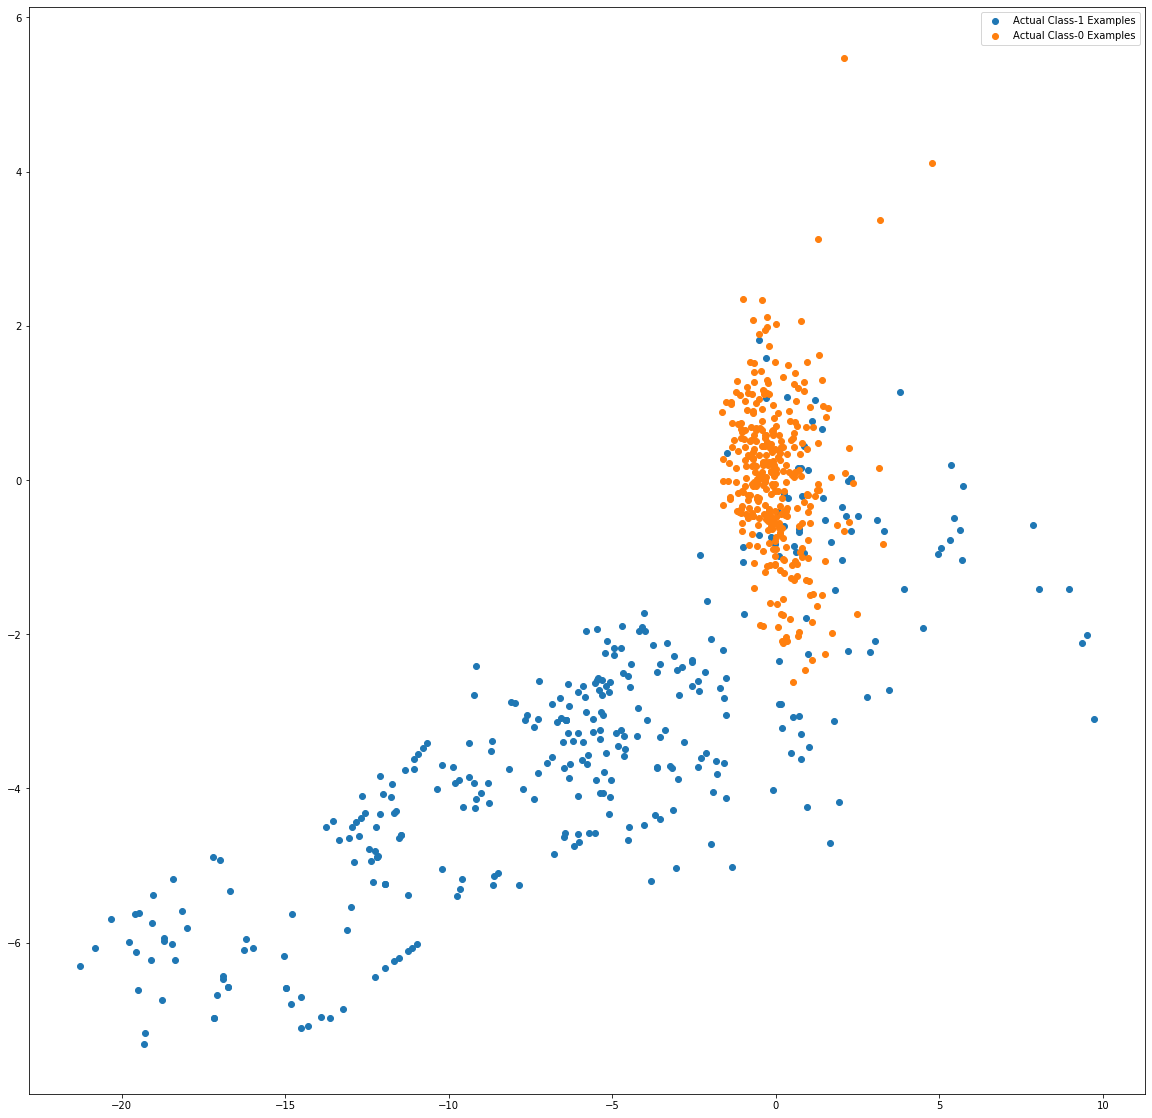

In [49]:
var_imp = []
for i in rfc.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(rfc.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(rfc.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(rfc.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(rfc.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(rfc.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## XGboost

In [50]:
from xgboost import XGBClassifier

In [51]:
xgbc = XGBClassifier()
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [52]:
# predict on train data
y_train_pred = xgbc.predict(X_train)

# create confusion matrix
xgbc_train_cm = confusion_matrix(y_train, y_train_pred)
print(xgbc_train_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train, y_train_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_train_pred_prob = xgbc.predict_proba(X_train)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_train, y_train_pred_prob),2))
auc_score_train.update({'Xgboost' : round(roc_auc_score(y_train, y_train_pred_prob),2)})
print(classification_report(y_train,y_train_pred))

[[199020      0]
 [     0    344]]
Sensitivity: 	1.0
Specificity: 	1.0
AUC:    	 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00       344

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364



In [53]:
# predict on test data
y_pred = xgbc.predict(X_test)

# create onfusion matrix
xgbc_test_cm = confusion_matrix(y_test, y_pred)
print(xgbc_test_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = xgbc.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))
auc_score_test.update({'Xgboost' : round(roc_auc_score(y_test, y_pred_prob),2)})
print(classification_report(y_test,y_pred))

[[85287     8]
 [   32   116]]
Sensitivity: 	0.78
Specificity: 	1.0
AUC:    	 0.97
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.94      0.78      0.85       148

    accuracy                           1.00     85443
   macro avg       0.97      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [74]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(1,10,2),
    'min_child_weight': range(1,10,2),
    'learning_rate' : [0.001,0.01,0.05, 0.1],
    'n_estimators' : [150, 200, 250, 300]
}

n_folds = StratifiedKFold(n_splits = 3, random_state = 4)

# Create a based model
xgbc = XGBClassifier()
# Instantiate the random search model
rand_search = RandomizedSearchCV(estimator = xgbc, param_distributions = param_grid, 
                          cv = n_folds, n_jobs = -1, verbose = 1, scoring='roc_auc', random_state = 100)
# Fit the grid search to the data
rand_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 29.8min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=False),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None,...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=None, tree_

In [75]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',rand_search.best_score_,'using',rand_search.best_params_)

We can get accuracy of 0.984018116497765 using {'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 9, 'learning_rate': 0.05}


In [54]:
xgbc = XGBClassifier(n_estimators=200, 
                     min_child_weight=3,
                     max_depth=9,
                     learning_rate=0.05,
                     random_state=100)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=9,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [55]:
# predict on train data
y_train_pred = xgbc.predict(X_train)

# create confusion matrix
xgbc_train_tune_cm = confusion_matrix(y_train, y_train_pred)
print(xgbc_train_tune_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train, y_train_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_train_pred_prob = xgbc.predict_proba(X_train)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_train, y_train_pred_prob),2))
auc_score_train.update({'Xgboost_tune' : round(roc_auc_score(y_train, y_train_pred_prob),2)})
print(classification_report(y_train,y_train_pred))

[[199020      0]
 [    33    311]]
Sensitivity: 	0.9
Specificity: 	1.0
AUC:    	 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      0.90      0.95       344

    accuracy                           1.00    199364
   macro avg       1.00      0.95      0.97    199364
weighted avg       1.00      1.00      1.00    199364



In [56]:
# predict on test data
y_pred = xgbc.predict(X_test)

# create confusion matrix
xgbc_test_tune_cm = confusion_matrix(y_test, y_pred)
print(xgbc_test_tune_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = xgbc.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))
auc_score_test.update({'Xgboost_tune' : round(roc_auc_score(y_test, y_pred_prob),2)})
print(classification_report(y_test,y_pred))

[[85282    13]
 [   32   116]]
Sensitivity: 	0.78
Specificity: 	1.0
AUC:    	 0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.90      0.78      0.84       148

    accuracy                           1.00     85443
   macro avg       0.95      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443



Top var = 17
2nd Top var = 14
3rd Top var = 10


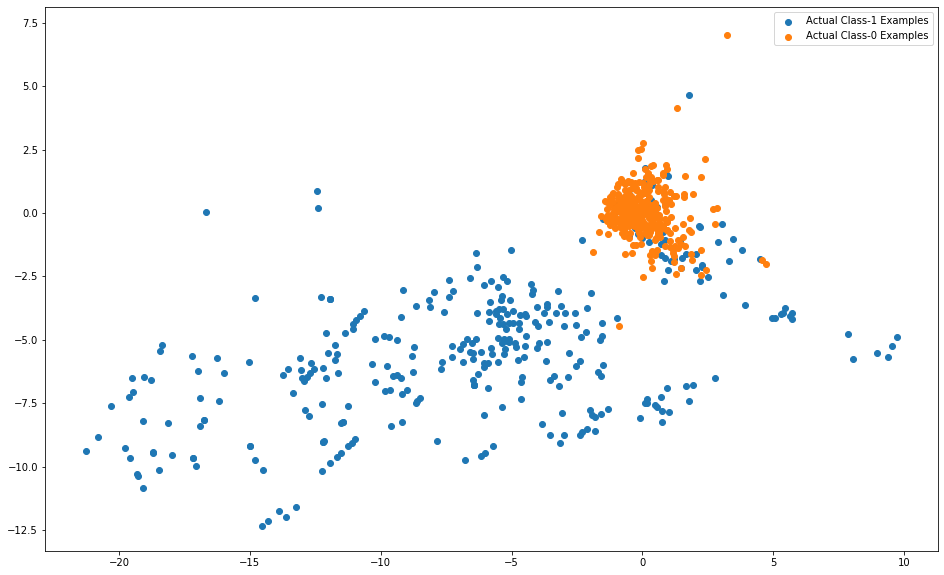

In [57]:
var_imp = []
for i in xgbc.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgbc.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgbc.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgbc.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgbc.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgbc.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 10]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

### Random Oversampling

In [58]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

In [59]:
print('Original dataset shape %s' % Counter(y_train))

ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_sample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_ros))

Original dataset shape Counter({0: 199020, 1: 344})
Resampled dataset shape Counter({0: 199020, 1: 199020})


In [60]:
# create pipeline
steps = [("logistic", LogisticRegression())]
pipeline = Pipeline(steps)

In [61]:
# fit model
pipeline.fit(X_ros, y_ros)

# check score on train data
pipeline.score(X_ros, y_ros)

0.9532157572103306

In [62]:
# predict on train data
y_train_pred = pipeline.predict(X_ros)

# create confusion matrix
lr_train_ros_cm = confusion_matrix(y_ros, y_train_pred)
print(lr_train_ros_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_ros, y_train_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_train_pred_prob = pipeline.predict_proba(X_ros)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_ros, y_train_pred_prob),2))
auc_score_train.update({'Logestic_ros' : round(roc_auc_score(y_ros, y_train_pred_prob),2)})
print(classification_report(y_ros,y_train_pred))

[[193910   5110]
 [ 13512 185508]]
Sensitivity: 	0.93
Specificity: 	0.97
AUC:    	 0.99
              precision    recall  f1-score   support

           0       0.93      0.97      0.95    199020
           1       0.97      0.93      0.95    199020

    accuracy                           0.95    398040
   macro avg       0.95      0.95      0.95    398040
weighted avg       0.95      0.95      0.95    398040



In [63]:
# predict on test data
y_pred = pipeline.predict(X_test)

# create confusion matrix
lr_test_ros_cm = confusion_matrix(y_test, y_pred)
print(lr_test_ros_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))
auc_score_test.update({'Logestic_ros' : round(roc_auc_score(y_test, y_pred_prob),2)})
print(classification_report(y_test,y_pred))

[[83103  2192]
 [   16   132]]
Sensitivity: 	0.89
Specificity: 	0.97
AUC:    	 0.98
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85295
           1       0.06      0.89      0.11       148

    accuracy                           0.97     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.97      0.99     85443



## Hyperparameter tunning

In [64]:
# logistic regression 
logistic = LogisticRegression()

# create pipeline
steps = [("logistic", logistic)]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.001, 0.1, 1, 5, 10, 50, 100, 200, 300, 400, 500], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc')

In [65]:
# fit model
model.fit(X_ros, y_ros)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=False),
             estimator=Pipeline(steps=[('logistic', LogisticRegression())]),
             param_grid={'logistic__C': [0.001, 0.1, 1, 5, 10, 50, 100, 200,
                                         300, 400, 500],
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [66]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9883485723851516
Best hyperparameters:  {'logistic__C': 500, 'logistic__penalty': 'l2'}


In [67]:
# predict on train data
y_train_pred = model.predict(X_ros)

# create confusion matrix
lr_train_ros_tune_cm = confusion_matrix(y_ros, y_train_pred)
print(lr_train_ros_tune_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_ros, y_train_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_train_pred_prob = model.predict_proba(X_ros)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_ros, y_train_pred_prob),2))
auc_score_train.update({'Logestic_ros_tune' : round(roc_auc_score(y_ros, y_train_pred_prob),2)})
print(classification_report(y_ros,y_train_pred))

[[193907   5113]
 [ 13512 185508]]
Sensitivity: 	0.93
Specificity: 	0.97
AUC:    	 0.99
              precision    recall  f1-score   support

           0       0.93      0.97      0.95    199020
           1       0.97      0.93      0.95    199020

    accuracy                           0.95    398040
   macro avg       0.95      0.95      0.95    398040
weighted avg       0.95      0.95      0.95    398040



In [68]:
# predict on test data
y_pred = model.predict(X_test)

# create confusion matrix
lr_test_ros_tune_cm = confusion_matrix(y_test, y_pred)
print(lr_test_ros_tune_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))
auc_score_test.update({'Logestic_ros_tune' : round(roc_auc_score(y_test, y_pred_prob),2)})
print(classification_report(y_test,y_pred))

[[83105  2190]
 [   16   132]]
Sensitivity: 	0.89
Specificity: 	0.97
AUC:    	 0.98
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85295
           1       0.06      0.89      0.11       148

    accuracy                           0.97     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.97      0.99     85443



## Decision tree

In [69]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_ros, y_ros)

DecisionTreeClassifier(max_depth=5)

In [70]:
# predict on train data
y_train_pred = dt.predict(X_ros)

# create confusion matrix
dt_train_ros_cm = confusion_matrix(y_ros, y_train_pred)
print(dt_train_ros_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_ros, y_train_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_train_pred_prob = dt.predict_proba(X_ros)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_ros, y_train_pred_prob),2))
auc_score_train.update({'Decision_tree_ros' : round(roc_auc_score(y_ros, y_train_pred_prob),2)})
print(classification_report(y_ros,y_train_pred))

[[194223   4797]
 [  6417 192603]]
Sensitivity: 	0.97
Specificity: 	0.98
AUC:    	 0.99
              precision    recall  f1-score   support

           0       0.97      0.98      0.97    199020
           1       0.98      0.97      0.97    199020

    accuracy                           0.97    398040
   macro avg       0.97      0.97      0.97    398040
weighted avg       0.97      0.97      0.97    398040



In [71]:
# predict on test data
y_pred = dt.predict(X_test)

# create confusion matrix
dt_test_ros_cm = confusion_matrix(y_test, y_pred)
print(dt_test_ros_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = dt.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))
auc_score_test.update({'Decision_tree_ros' : round(roc_auc_score(y_test, y_pred_prob),2)})
print(classification_report(y_test,y_pred))

[[83320  1975]
 [   21   127]]
Sensitivity: 	0.86
Specificity: 	0.98
AUC:    	 0.93
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.86      0.11       148

    accuracy                           0.98     85443
   macro avg       0.53      0.92      0.55     85443
weighted avg       1.00      0.98      0.99     85443



In [66]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(1, 500, 5),
    'min_samples_leaf': range(1, 1000, 5),
    'min_samples_split': range(1, 1000, 5),
    'criterion': ["entropy", "gini"]
}

n_folds = StratifiedKFold(n_splits = 10, random_state = 4)

# Instantiate the random search model
dtree = DecisionTreeClassifier()
rand_search = RandomizedSearchCV(estimator = dtree, param_distributions = param_grid, 
                          cv = n_folds, n_jobs = -1, verbose = 1, scoring='roc_auc', random_state = 100)

# Fit the grid search to the data
rand_search.fit(X_ros,y_ros)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  5.9min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=4, shuffle=False),
                   estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': range(1, 500, 5),
                                        'min_samples_leaf': range(1, 1000, 5),
                                        'min_samples_split': range(1, 1000, 5)},
                   random_state=100, scoring='roc_auc', verbose=1)

In [67]:
# cv results
cv_results = pd.DataFrame(rand_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,26.664516,1.305389,0.059870,0.010367,81,836,231,entropy,"{'min_samples_split': 81, 'min_samples_leaf': ...",0.999037,...,0.999144,0.998861,0.998790,0.998929,0.998806,0.999008,0.998865,0.998912,0.000117,9
1,25.311207,1.241649,0.049225,0.004607,841,471,161,gini,"{'min_samples_split': 841, 'min_samples_leaf':...",0.999554,...,0.999326,0.999446,0.999199,0.999308,0.999452,0.999110,0.999151,0.999336,0.000146,7
2,25.355038,0.978932,0.049793,0.005468,296,126,51,gini,"{'min_samples_split': 296, 'min_samples_leaf':...",0.999799,...,0.999762,0.999703,0.999719,0.999783,0.999740,0.999815,0.999816,0.999765,0.000037,3
3,30.608405,3.037695,0.050531,0.013414,196,31,371,entropy,"{'min_samples_split': 196, 'min_samples_leaf':...",0.999795,...,0.999875,0.999840,0.999756,0.999911,0.999761,0.999879,0.999810,0.999828,0.000053,1
4,24.637635,1.774564,0.053199,0.015851,596,496,31,gini,"{'min_samples_split': 596, 'min_samples_leaf':...",0.999577,...,0.999277,0.999484,0.999155,0.999206,0.999526,0.999131,0.999149,0.999319,0.000165,8
5,24.196928,1.970174,0.053001,0.009909,81,181,51,gini,"{'min_samples_split': 81, 'min_samples_leaf': ...",0.999780,...,0.999725,0.999696,0.999581,0.999669,0.999639,0.999623,0.999684,0.999676,0.000052,4
6,26.230551,1.227231,0.048999,0.009180,651,966,86,entropy,"{'min_samples_split': 651, 'min_samples_leaf':...",0.998661,...,0.998774,0.998561,0.998442,0.998647,0.998486,0.998652,0.998538,0.998584,0.000094,10
7,30.207426,2.997461,0.109829,0.109837,711,251,436,entropy,"{'min_samples_split': 711, 'min_samples_leaf':...",0.999649,...,0.999714,0.999618,0.999526,0.999629,0.999597,0.999705,0.999550,0.999641,0.000066,5
8,29.157360,1.621152,0.063814,0.032294,701,506,246,entropy,"{'min_samples_split': 701, 'min_samples_leaf':...",0.999550,...,0.999532,0.999505,0.999418,0.999512,0.999460,0.999618,0.999504,0.999507,0.000052,6
9,28.755808,2.465974,0.049860,0.018190,491,41,256,entropy,"{'min_samples_split': 491, 'min_samples_leaf':...",0.999896,...,0.999863,0.999779,0.999766,0.999889,0.999772,0.999801,0.999772,0.999822,0.000052,2


In [68]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", rand_search.best_score_)
print(rand_search.best_estimator_)

best accuracy 0.9998284320029768
DecisionTreeClassifier(criterion='entropy', max_depth=371, min_samples_leaf=31,
                       min_samples_split=196)


In [72]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion='entropy',
                                  random_state = 100,
                                  max_depth=371, 
                                  min_samples_leaf=31,
                                  min_samples_split=196)
clf_gini.fit(X_ros, y_ros)

DecisionTreeClassifier(criterion='entropy', max_depth=371, min_samples_leaf=31,
                       min_samples_split=196, random_state=100)

In [73]:
# predict on train data
y_train_pred = clf_gini.predict(X_ros)

# create confusion matrix
dt_train_ros_tune_cm = confusion_matrix(y_ros, y_train_pred)
print(dt_train_ros_tune_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_ros, y_train_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_train_pred_prob = clf_gini.predict_proba(X_ros)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_ros, y_train_pred_prob),2))
auc_score_train.update({'Decision_tree_ros_tune' : round(roc_auc_score(y_ros, y_train_pred_prob),2)})
print(classification_report(y_ros,y_train_pred))

[[198832    188]
 [     0 199020]]
Sensitivity: 	1.0
Specificity: 	1.0
AUC:    	 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199020

    accuracy                           1.00    398040
   macro avg       1.00      1.00      1.00    398040
weighted avg       1.00      1.00      1.00    398040



In [74]:
# accuracy score
clf_gini.score(X_test,y_test)

0.9984785178423042

In [75]:
# predict on test data
y_pred = clf_gini.predict(X_test)

# create confusion matrix
dt_test_ros_tune_cm = confusion_matrix(y_test, y_pred)
print(dt_test_ros_tune_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 3), "\n", "Specificity: \t", round(specificity, 3), sep='')

# check area under curve
y_pred_prob = clf_gini.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))
auc_score_test.update({'Decision_tree_ros_tune' : round(roc_auc_score(y_test, y_pred_prob),2)})
print(classification_report(y_test, y_pred))

[[85192   103]
 [   27   121]]
Sensitivity: 	0.818
Specificity: 	0.999
AUC:    	 0.91
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.54      0.82      0.65       148

    accuracy                           1.00     85443
   macro avg       0.77      0.91      0.82     85443
weighted avg       1.00      1.00      1.00     85443



Top var = 14
2nd Top var = 4
3rd Top var = 15


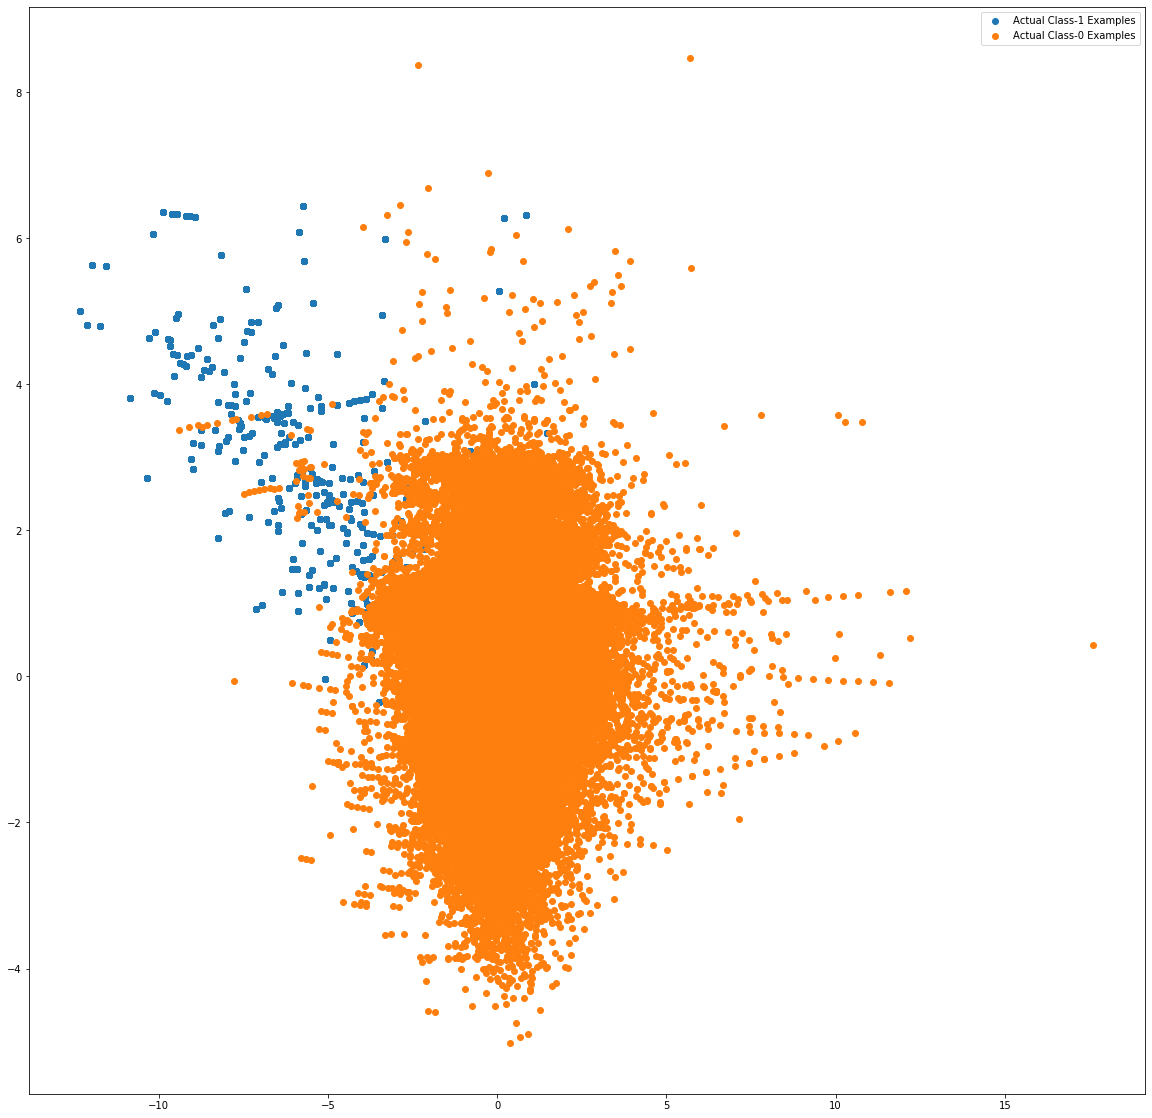

In [76]:
var_imp = []
for i in clf_gini.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf_gini.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf_gini.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf_gini.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf_gini.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf_gini.feature_importances_)[-2])

X_train_1 = X_ros.to_numpy()[np.where(y_ros==1.0)]
X_train_0 = X_ros.to_numpy()[np.where(y_ros==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Random Forest

In [77]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [78]:
# fit model
rfc.fit(X_ros, y_ros)

RandomForestClassifier()

In [79]:
# predict on train data
y_train_pred = rfc.predict(X_ros)

# create confusion matrix
rfc_train_ros_cm = confusion_matrix(y_ros, y_train_pred)
print(rfc_train_ros_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_ros, y_train_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_train_pred_prob = rfc.predict_proba(X_ros)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_ros, y_train_pred_prob),2))
auc_score_train.update({'Random_forest_ros' : round(roc_auc_score(y_ros, y_train_pred_prob),2)})
print(classification_report(y_ros,y_train_pred))

[[199020      0]
 [     0 199020]]
Sensitivity: 	1.0
Specificity: 	1.0
AUC:    	 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199020

    accuracy                           1.00    398040
   macro avg       1.00      1.00      1.00    398040
weighted avg       1.00      1.00      1.00    398040



In [80]:
# predict on test data
y_pred = rfc.predict(X_test)

# create confusion matrix
rfc_test_ros_cm = confusion_matrix(y_test, y_pred)
print(rfc_test_ros_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rfc.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))
auc_score_test.update({'Random_forest_ros' : round(roc_auc_score(y_test, y_pred_prob),2)})
print(classification_report(y_test,y_pred))

[[85285    10]
 [   34   114]]
Sensitivity: 	0.77
Specificity: 	1.0
AUC:    	 0.95
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.92      0.77      0.84       148

    accuracy                           1.00     85443
   macro avg       0.96      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [27]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(1, 200, 10),
    'min_samples_leaf': range(1, 200, 10),
    'min_samples_split': range(1, 200, 10),
    'n_estimators': range(1, 200, 10), 
    'max_features': [15, 20, 21, 25]
}

n_folds = StratifiedKFold(n_splits =3, random_state = 4)

# Create a based model
rf = RandomForestClassifier()
# Instantiate the random search model
rand_search = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                          cv = n_folds, n_jobs = -1, verbose = 1, scoring='roc_auc', random_state = 100)
# Fit the grid search to the data
rand_search.fit(X_ros, y_ros)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 58.3min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=False),
                   estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': range(1, 200, 10),
                                        'max_features': [15, 20, 21, 25],
                                        'min_samples_leaf': range(1, 200, 10),
                                        'min_samples_split': range(1, 200, 10),
                                        'n_estimators': range(1, 200, 10)},
                   random_state=100, scoring='roc_auc', verbose=1)

In [28]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',rand_search.best_score_,'using',rand_search.best_params_)

We can get accuracy of 0.9999645147717636 using {'n_estimators': 151, 'min_samples_split': 171, 'min_samples_leaf': 61, 'max_features': 21, 'max_depth': 61}


In [81]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=7,
                             min_samples_leaf=61, 
                             min_samples_split=171,
                             max_features=21,
                             n_estimators=151,
                             random_state = 100)

In [82]:
# fit
rfc.fit(X_ros,y_ros)

RandomForestClassifier(max_depth=7, max_features=21, min_samples_leaf=61,
                       min_samples_split=171, n_estimators=151,
                       random_state=100)

In [83]:
# predict on train data
y_train_pred = rfc.predict(X_ros)

# create confusion matrix
rfc_train_ros_tune_cm = confusion_matrix(y_ros, y_train_pred)
print(rfc_train_ros_tune_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_ros, y_train_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_train_pred_prob = rfc.predict_proba(X_ros)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_ros, y_train_pred_prob),2))
auc_score_train.update({'Random_forest_ros_tune' : round(roc_auc_score(y_ros, y_train_pred_prob),2)})
print(classification_report(y_ros,y_train_pred))

[[198585    435]
 [  2898 196122]]
Sensitivity: 	0.99
Specificity: 	1.0
AUC:    	 1.0
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    199020
           1       1.00      0.99      0.99    199020

    accuracy                           0.99    398040
   macro avg       0.99      0.99      0.99    398040
weighted avg       0.99      0.99      0.99    398040



In [84]:
# predict on test data
y_pred = rfc.predict(X_test)

# create confusion matrix
rfc_test_ros_tune_cm = confusion_matrix(y_test, y_pred)
print(rfc_test_ros_tune_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rfc.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))
auc_score_test.update({'Random_forest_ros_tune' : round(roc_auc_score(y_test, y_pred_prob),2)})
print(classification_report(y_test,y_pred))

[[85089   206]
 [   23   125]]
Sensitivity: 	0.84
Specificity: 	1.0
AUC:    	 0.96
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.38      0.84      0.52       148

    accuracy                           1.00     85443
   macro avg       0.69      0.92      0.76     85443
weighted avg       1.00      1.00      1.00     85443



Top var = 14
2nd Top var = 10
3rd Top var = 4


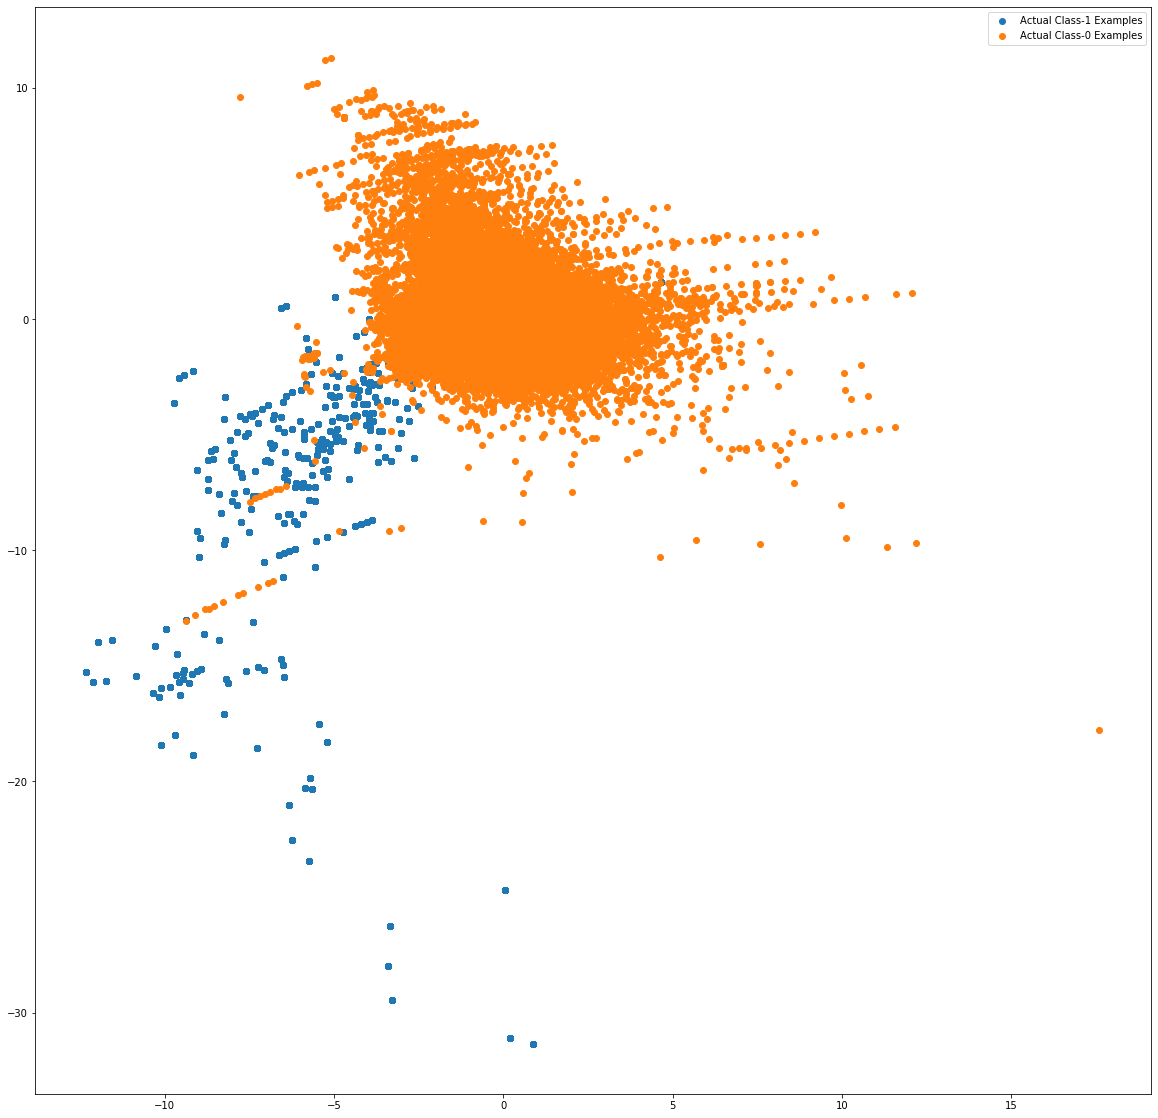

In [85]:
var_imp = []
for i in rfc.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(rfc.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(rfc.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(rfc.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(rfc.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(rfc.feature_importances_)[-2])

X_train_1 = X_ros.to_numpy()[np.where(y_ros==1.0)]
X_train_0 = X_ros.to_numpy()[np.where(y_ros==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## XGboost

In [86]:
from xgboost import XGBClassifier

In [87]:
xgbc = XGBClassifier()
xgbc.fit(X_ros,y_ros)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [88]:
# predict on train data
y_train_pred = xgbc.predict(X_ros)

# create confusion matrix
xgbc_train_ros_cm = confusion_matrix(y_ros, y_train_pred)
print(xgbc_train_ros_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_ros, y_train_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_train_pred_prob = xgbc.predict_proba(X_ros)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_ros, y_train_pred_prob),2))
auc_score_train.update({'Xgboost_ros' : round(roc_auc_score(y_ros, y_train_pred_prob),3)})
print(classification_report(y_ros,y_train_pred))

[[199020      0]
 [     0 199020]]
Sensitivity: 	1.0
Specificity: 	1.0
AUC:    	 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199020

    accuracy                           1.00    398040
   macro avg       1.00      1.00      1.00    398040
weighted avg       1.00      1.00      1.00    398040



In [89]:
# predict on test data
y_pred = xgbc.predict(X_test)

# create confusion matrix
xgbc_test_ros_cm = confusion_matrix(y_test, y_pred)
print(xgbc_test_ros_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = xgbc.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))
auc_score_test.update({'Xgboost_ros' : round(roc_auc_score(y_test, y_pred_prob),3)})
print(classification_report(y_test,y_pred))

[[85279    16]
 [   24   124]]
Sensitivity: 	0.84
Specificity: 	1.0
AUC:    	 0.97
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.89      0.84      0.86       148

    accuracy                           1.00     85443
   macro avg       0.94      0.92      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [41]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(1,500,50),
    'min_child_weight': range(1,500,50),
    'learning_rate' : [0.001,0.01,0.05, 0.1, 1],
    'n_estimators' : range(1,500,50)
}

n_folds = StratifiedKFold(n_splits = 3, random_state = 4)

# Create a based model
xgbc = XGBClassifier()
# Instantiate the random search model
rand_search = RandomizedSearchCV(estimator = xgbc, param_distributions = param_grid, 
                          cv = n_folds, n_jobs = -1, verbose = 1, scoring='roc_auc', random_state = 100)
# Fit the grid search to the data
rand_search.fit(X_ros, y_ros)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 42.6min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=False),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None,...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=None, tree_

In [42]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',rand_search.best_score_,'using',rand_search.best_params_)

We can get accuracy of 0.9999476969105202 using {'n_estimators': 351, 'min_child_weight': 101, 'max_depth': 451, 'learning_rate': 0.1}


In [90]:
xgbc = XGBClassifier(n_estimators=351, 
                     min_child_weight=101,
                     max_depth=451,
                     learning_rate=0.1,
                     random_state=100)
xgbc.fit(X_ros,y_ros)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=451,
              min_child_weight=101, missing=nan, monotone_constraints='()',
              n_estimators=351, n_jobs=0, num_parallel_tree=1, random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [91]:
# predict on train data
y_train_pred = xgbc.predict(X_ros)

# create confusion matrix
xgbc_train_ros_tune_cm = confusion_matrix(y_ros, y_train_pred)
print(xgbc_train_ros_tune_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_ros, y_train_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_train_pred_prob = xgbc.predict_proba(X_ros)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_ros, y_train_pred_prob),2))
auc_score_train.update({'Xgboost_ros_tune' : round(roc_auc_score(y_ros, y_train_pred_prob),3)})
print(classification_report(y_ros,y_train_pred))

[[198931     89]
 [     0 199020]]
Sensitivity: 	1.0
Specificity: 	1.0
AUC:    	 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199020

    accuracy                           1.00    398040
   macro avg       1.00      1.00      1.00    398040
weighted avg       1.00      1.00      1.00    398040



In [92]:
# predict on test data
y_pred = xgbc.predict(X_test)

# create confusion matrix
xgbc_test_ros_tune_cm = confusion_matrix(y_test, y_pred)
print(xgbc_test_ros_tune_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = xgbc.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))
auc_score_test.update({'Xgboost_ros_tune' : round(roc_auc_score(y_test, y_pred_prob),3)})
print(classification_report(y_test,y_pred))

[[85236    59]
 [   23   125]]
Sensitivity: 	0.84
Specificity: 	1.0
AUC:    	 0.97
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.68      0.84      0.75       148

    accuracy                           1.00     85443
   macro avg       0.84      0.92      0.88     85443
weighted avg       1.00      1.00      1.00     85443



Top var = 14
2nd Top var = 4
3rd Top var = 12


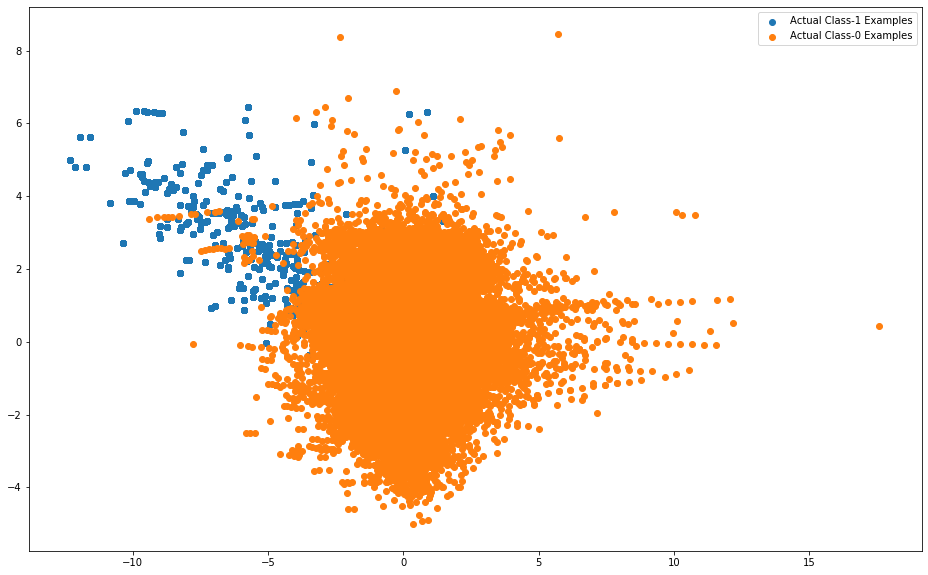

In [93]:
var_imp = []
for i in xgbc.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgbc.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgbc.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgbc.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgbc.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgbc.feature_importances_)[-2])

X_train_1 = X_ros.to_numpy()[np.where(y_ros==1.0)]
X_train_0 = X_ros.to_numpy()[np.where(y_ros==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 10]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

### Print the class distribution after applying SMOTE 

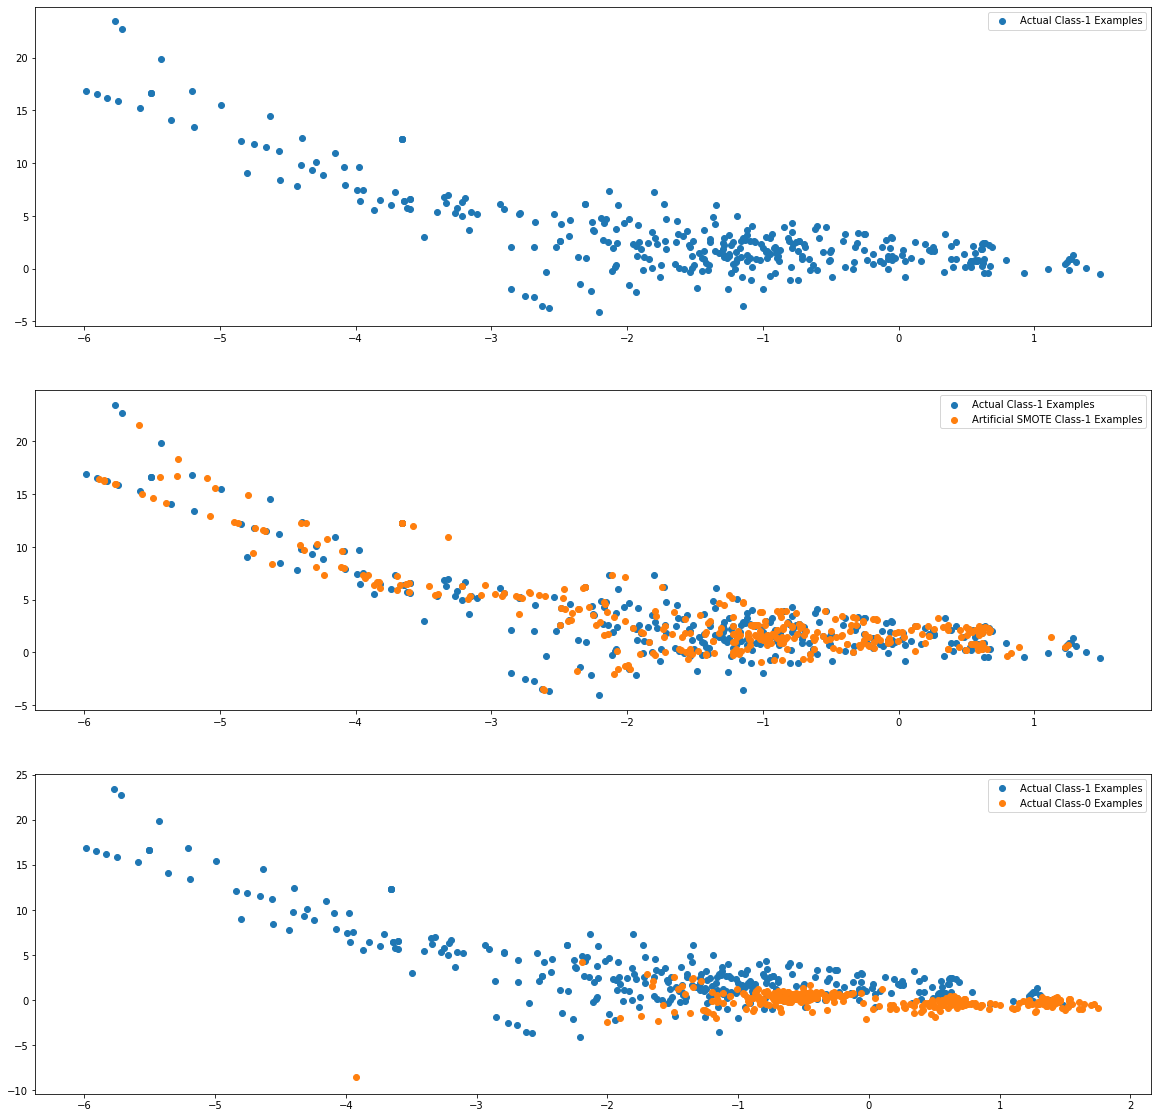

In [94]:
import warnings
warnings.filterwarnings("ignore")

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=1000)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do

X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [95]:
from collections import Counter
print('Original dataset shape %s' % Counter(y_train))
print('Resampled dataset shape %s' % Counter(y_train_smote))

Original dataset shape Counter({0: 199020, 1: 344})
Resampled dataset shape Counter({0: 199020, 1: 199020})


In [96]:
# create pipeline
steps = [("logistic", LogisticRegression())]
pipeline = Pipeline(steps)

In [97]:
# fit model
pipeline.fit(X_train_smote, y_train_smote)

# check score on train data
pipeline.score(X_train_smote, y_train_smote)

0.9486483770475329

In [98]:
# predict on train data
y_train_pred = pipeline.predict(X_train_smote)

# create confusion matrix
lr_train_smote_cm = confusion_matrix(y_train_smote, y_train_pred)
print(lr_train_smote_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train_smote, y_train_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_train_pred_prob = pipeline.predict_proba(X_train_smote)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_train_smote, y_train_pred_prob),2))
auc_score_train.update({'Logestic_smote' : round(roc_auc_score(y_train_smote, y_train_pred_prob),3)})
print(classification_report(y_train_smote,y_train_pred))

[[193483   5537]
 [ 14903 184117]]
Sensitivity: 	0.93
Specificity: 	0.97
AUC:    	 0.99
              precision    recall  f1-score   support

           0       0.93      0.97      0.95    199020
           1       0.97      0.93      0.95    199020

    accuracy                           0.95    398040
   macro avg       0.95      0.95      0.95    398040
weighted avg       0.95      0.95      0.95    398040



In [99]:
# predict on test data
y_pred = pipeline.predict(X_test)

# create confusion matrix
lr_test_smote_cm = confusion_matrix(y_test, y_pred)
print(lr_test_smote_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))
auc_score_test.update({'Logestic_smote' : round(roc_auc_score(y_test, y_pred_prob),3)})
print(classification_report(y_test,y_pred))

[[82999  2296]
 [   16   132]]
Sensitivity: 	0.89
Specificity: 	0.97
AUC:    	 0.98
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85295
           1       0.05      0.89      0.10       148

    accuracy                           0.97     85443
   macro avg       0.53      0.93      0.54     85443
weighted avg       1.00      0.97      0.98     85443



## Hyperparameter tunning

In [100]:
# logistic regression 
logistic = LogisticRegression()

# create pipeline
steps = [("logistic", logistic)]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': range(1, 1000, 100), 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc')

In [101]:
# fit model
model.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=False),
             estimator=Pipeline(steps=[('logistic', LogisticRegression())]),
             param_grid={'logistic__C': range(1, 1000, 100),
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [102]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9902081453013849
Best hyperparameters:  {'logistic__C': 801, 'logistic__penalty': 'l2'}


In [103]:
# predict on train data
y_train_pred = model.predict(X_train_smote)

# create confusion matrix
lr_train_smote_tune_cm = confusion_matrix(y_train_smote, y_train_pred)
print(lr_train_smote_tune_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train_smote, y_train_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_train_pred_prob = model.predict_proba(X_train_smote)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_train_smote, y_train_pred_prob),2))
auc_score_train.update({'Logestic_smote_tune' : round(roc_auc_score(y_train_smote, y_train_pred_prob),3)})
print(classification_report(y_train_smote,y_train_pred))

[[193478   5542]
 [ 14900 184120]]
Sensitivity: 	0.93
Specificity: 	0.97
AUC:    	 0.99
              precision    recall  f1-score   support

           0       0.93      0.97      0.95    199020
           1       0.97      0.93      0.95    199020

    accuracy                           0.95    398040
   macro avg       0.95      0.95      0.95    398040
weighted avg       0.95      0.95      0.95    398040



In [104]:
# predict on test data
y_pred = model.predict(X_test)

# create confusion matrix
lr_test_smote_tune_cm = confusion_matrix(y_test, y_pred)
print(lr_test_smote_tune_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))
auc_score_test.update({'Logestic_smote_tune' : round(roc_auc_score(y_test, y_pred_prob),3)})
print(classification_report(y_test,y_pred))

[[82998  2297]
 [   16   132]]
Sensitivity: 	0.89
Specificity: 	0.97
AUC:    	 0.98
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85295
           1       0.05      0.89      0.10       148

    accuracy                           0.97     85443
   macro avg       0.53      0.93      0.54     85443
weighted avg       1.00      0.97      0.98     85443



## Decision tree

In [105]:
# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=5)

In [106]:
# predict on train data
y_train_pred = dt.predict(X_train_smote)

# create confusion matrix
dt_train_smote_cm = confusion_matrix(y_train_smote, y_train_pred)
print(dt_train_smote_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train_smote, y_train_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_train_pred_prob = model.predict_proba(X_train_smote)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_train_smote, y_train_pred_prob),2))
auc_score_train.update({'Decision_tree_smote' : round(roc_auc_score(y_train_smote, y_train_pred_prob),3)})
print(classification_report(y_train_smote,y_train_pred))

[[191149   7871]
 [  7651 191369]]
Sensitivity: 	0.96
Specificity: 	0.96
AUC:    	 0.99
              precision    recall  f1-score   support

           0       0.96      0.96      0.96    199020
           1       0.96      0.96      0.96    199020

    accuracy                           0.96    398040
   macro avg       0.96      0.96      0.96    398040
weighted avg       0.96      0.96      0.96    398040



In [107]:
# predict on test data
y_pred = dt.predict(X_test)

# create confusion matrix
dt_test_smote_cm = confusion_matrix(y_test, y_pred)
print(dt_test_smote_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 3), "\n", "Specificity: \t", round(specificity, 3), sep='')

# check area under curve
y_pred_prob = dt.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))
auc_score_test.update({'Decision_tree_smote' : round(roc_auc_score(y_test, y_pred_prob),3)})
print(classification_report(y_test, y_pred))

[[81926  3369]
 [   19   129]]
Sensitivity: 	0.872
Specificity: 	0.961
AUC:    	 0.95
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85295
           1       0.04      0.87      0.07       148

    accuracy                           0.96     85443
   macro avg       0.52      0.92      0.53     85443
weighted avg       1.00      0.96      0.98     85443



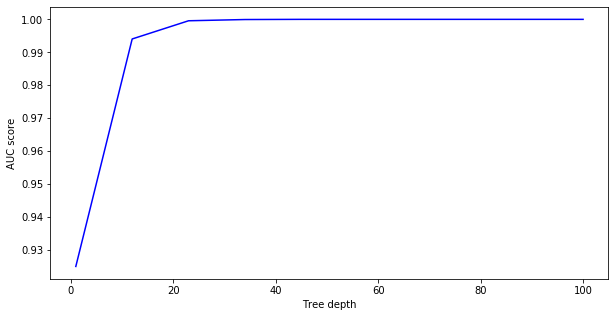

In [130]:
from sklearn.metrics import roc_curve, auc
plt.rcParams['figure.figsize'] = [10, 5]
max_depths = np.linspace(1, 100, 10, endpoint=True)
train_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train_smote, y_train_smote)
    train_pred = dt.predict(X_train_smote)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_smote, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

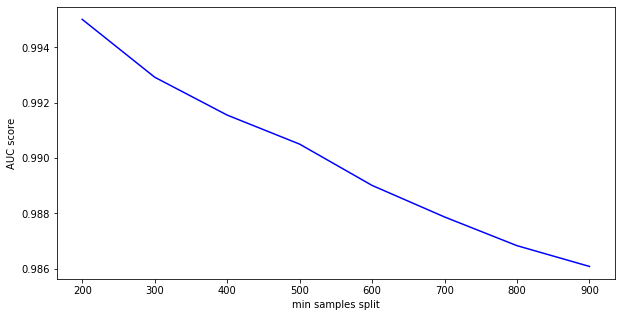

In [120]:
from sklearn.metrics import roc_curve, auc
plt.rcParams['figure.figsize'] = [10, 5]
min_samples_splits = list(range(200, 1000, 100))
train_results = []
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
    dt.fit(X_train_smote, y_train_smote)
    train_pred = dt.predict(X_train_smote)
    false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train_smote, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

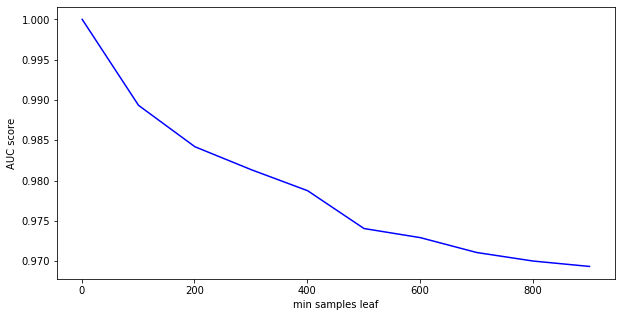

In [121]:
min_samples_leafs = list(range(1, 1000, 100))
train_results = []
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    dt.fit(X_train_smote, y_train_smote)
    train_pred = dt.predict(X_train_smote)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_smote, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

In [137]:
# Create the parameter grid 
param_grid = {
    'max_depth': list(range(1, 100, 10)),
    'min_samples_leaf': list(range(1, 1000, 100)),
    'min_samples_split': list(range(1, 1000, 100)),
    'criterion': ["entropy", "gini"]
}

n_folds = StratifiedKFold(n_splits = 5, random_state = 4)

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
rand_search = RandomizedSearchCV(estimator = dtree, param_distributions = param_grid, 
                          cv = n_folds, n_jobs = -1, verbose = 1, scoring='roc_auc', random_state = 100)

# Fit the grid search to the data
rand_search.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.4min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=False),
                   estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [1, 11, 21, 31, 41, 51, 61,
                                                      71, 81, 91],
                                        'min_samples_leaf': [1, 101, 201, 301,
                                                             401, 501, 601, 701,
                                                             801, 901],
                                        'min_samples_split': [1, 101, 201, 301,
                                                              401, 501, 601,
                                                              701, 801, 901]},
                   random_state=100, scoring='roc_auc', verbose=1)

In [138]:
# cv results
cv_results = pd.DataFrame(rand_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,33.800864,1.636740,0.067525,0.003805,401,401,51,gini,"{'min_samples_split': 401, 'min_samples_leaf':...",0.997875,0.997685,0.997583,0.997605,0.997612,0.997672,0.000107,1
1,29.291656,2.214305,0.071319,0.008335,201,901,71,entropy,"{'min_samples_split': 201, 'min_samples_leaf':...",0.997100,0.997230,0.996878,0.996794,0.997110,0.997022,0.000161,3
2,36.455537,1.452780,0.070414,0.004867,901,501,81,gini,"{'min_samples_split': 901, 'min_samples_leaf':...",0.997579,0.997296,0.997263,0.997106,0.997343,0.997317,0.000153,2
3,35.209600,2.891558,0.083775,0.009293,501,901,81,gini,"{'min_samples_split': 501, 'min_samples_leaf':...",0.995979,0.995789,0.995519,0.995376,0.995369,0.995606,0.000241,7
4,42.329092,4.446969,0.088360,0.014154,901,701,81,gini,"{'min_samples_split': 901, 'min_samples_leaf':...",0.996865,0.996552,0.996671,0.996298,0.996606,0.996598,0.000184,6
5,6.621825,0.201590,0.072354,0.006620,901,701,1,entropy,"{'min_samples_split': 901, 'min_samples_leaf':...",0.920548,0.921239,0.920008,0.916880,0.920083,0.919752,0.001501,8
6,64.223309,2.387058,0.108516,0.017575,801,601,91,gini,"{'min_samples_split': 801, 'min_samples_leaf':...",0.997185,0.996892,0.996979,0.996808,0.996821,0.996937,0.000138,4
7,0.461552,0.068117,0.000000,0.000000,1,301,91,gini,"{'min_samples_split': 1, 'min_samples_leaf': 3...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
8,0.518840,0.020841,0.000000,0.000000,1,501,31,entropy,"{'min_samples_split': 1, 'min_samples_leaf': 5...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
9,45.890629,14.202587,0.061236,0.030347,201,701,91,gini,"{'min_samples_split': 201, 'min_samples_leaf':...",0.996849,0.996554,0.996694,0.996314,0.996604,0.996603,0.000176,5


In [139]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", rand_search.best_score_)
print(rand_search.best_estimator_)

best accuracy 0.9976719526574598
DecisionTreeClassifier(max_depth=51, min_samples_leaf=401,
                       min_samples_split=401)


In [108]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion='entropy',
                                  random_state = 100,
                                  max_depth=51, 
                                  min_samples_leaf=401,
                                  min_samples_split=401)
clf_gini.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(criterion='entropy', max_depth=51, min_samples_leaf=401,
                       min_samples_split=401, random_state=100)

In [109]:
# predict on train data
y_train_pred = clf_gini.predict(X_train_smote)

# create confusion matrix
dt_train_smote_tune_cm = confusion_matrix(y_train_smote, y_train_pred)
print(dt_train_smote_tune_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train_smote, y_train_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 3), "\n", "Specificity: \t", round(specificity, 3), sep='')

# check area under curve
y_train_pred_prob = clf_gini.predict_proba(X_train_smote)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_train_smote, y_train_pred_prob),2))
auc_score_train.update({'Decision_tree_smote_tune' : round(roc_auc_score(y_train_smote, y_train_pred_prob),3)})
print(classification_report(y_train_smote, y_train_pred))

[[195017   4003]
 [  2748 196272]]
Sensitivity: 	0.986
Specificity: 	0.98
AUC:    	 1.0
              precision    recall  f1-score   support

           0       0.99      0.98      0.98    199020
           1       0.98      0.99      0.98    199020

    accuracy                           0.98    398040
   macro avg       0.98      0.98      0.98    398040
weighted avg       0.98      0.98      0.98    398040



In [110]:
# accuracy score
clf_gini.score(X_test,y_test)

0.9791088796039464

In [111]:
# predict on test data
y_pred = clf_gini.predict(X_test)

# create confusion matrix
dt_test_smote_tune_cm = confusion_matrix(y_test, y_pred)
print(dt_test_smote_tune_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 3), "\n", "Specificity: \t", round(specificity, 3), sep='')

# check area under curve
y_pred_prob = clf_gini.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))
auc_score_test.update({'Decision_tree_smote_tune' : round(roc_auc_score(y_test, y_pred_prob),3)})
print(classification_report(y_test, y_pred))

[[83528  1767]
 [   18   130]]
Sensitivity: 	0.878
Specificity: 	0.979
AUC:    	 0.96
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.07      0.88      0.13       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.56     85443
weighted avg       1.00      0.98      0.99     85443



Top var = 14
2nd Top var = 4
3rd Top var = 12


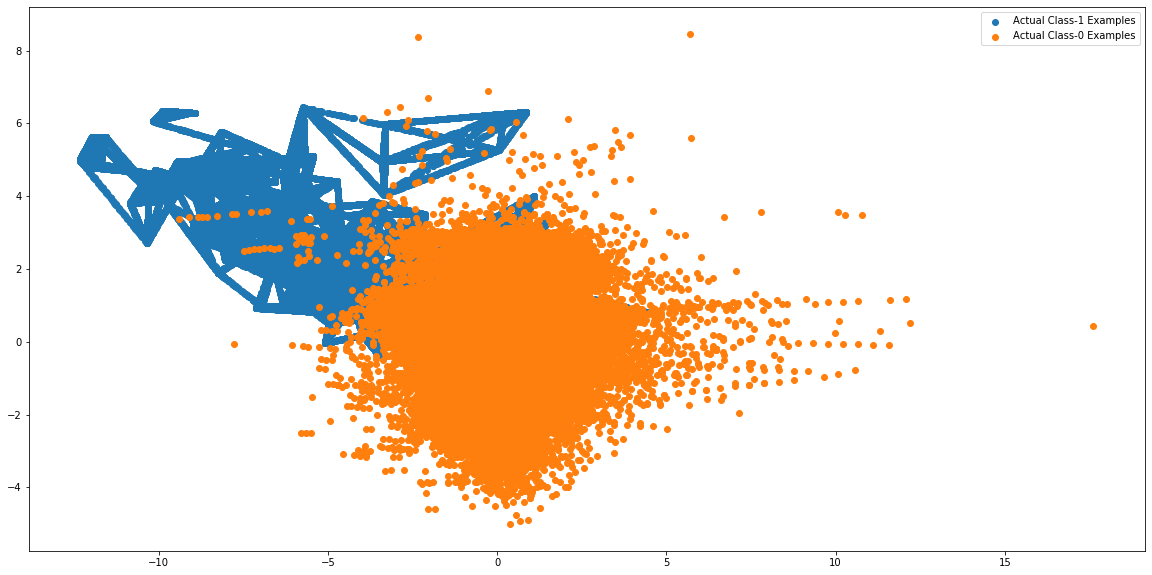

In [112]:
var_imp = []
for i in clf_gini.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf_gini.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf_gini.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf_gini.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf_gini.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf_gini.feature_importances_)[-2])

X_train_1 = X_train_smote.to_numpy()[np.where(y_train_smote==1.0)]
X_train_0 = X_train_smote.to_numpy()[np.where(y_train_smote==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Random Forest

In [113]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [114]:
# fit model
rfc.fit(X_train_smote, y_train_smote)

RandomForestClassifier()

In [115]:
# predict on train data
y_train_pred = rfc.predict(X_train_smote)

# create confusion matrix
rfc_train_smote_cm = confusion_matrix(y_train_smote, y_train_pred)
print(rfc_train_smote_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train_smote, y_train_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 3), "\n", "Specificity: \t", round(specificity, 3), sep='')

# check area under curve
y_train_pred_prob = rfc.predict_proba(X_train_smote)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_train_smote, y_train_pred_prob),2))
auc_score_train.update({'Random_forest_smote' : round(roc_auc_score(y_train_smote, y_train_pred_prob),3)})
print(classification_report(y_train_smote, y_train_pred))

[[199020      0]
 [     0 199020]]
Sensitivity: 	1.0
Specificity: 	1.0
AUC:    	 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199020

    accuracy                           1.00    398040
   macro avg       1.00      1.00      1.00    398040
weighted avg       1.00      1.00      1.00    398040



In [116]:
# predict on test data
y_pred = rfc.predict(X_test)

# create confusion matrix
rfc_test_smote_cm = confusion_matrix(y_test, y_pred)
print(rfc_test_smote_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rfc.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))
auc_score_test.update({'Random_forest_smote' : round(roc_auc_score(y_test, y_pred_prob),3)})
print(classification_report(y_test,y_pred))

[[85279    16]
 [   26   122]]
Sensitivity: 	0.82
Specificity: 	1.0
AUC:    	 0.97
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.88      0.82      0.85       148

    accuracy                           1.00     85443
   macro avg       0.94      0.91      0.93     85443
weighted avg       1.00      1.00      1.00     85443



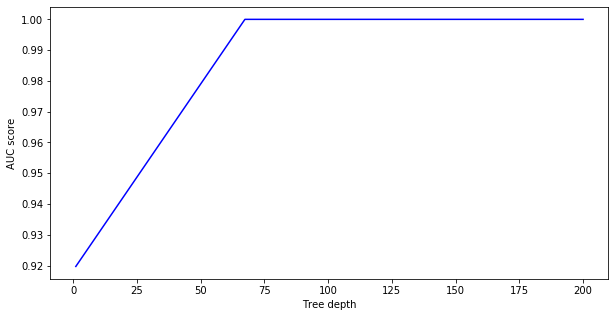

In [155]:
from sklearn.metrics import roc_curve, auc
plt.rcParams['figure.figsize'] = [10, 5]
max_depths = np.linspace(1, 200, 4, endpoint=True)
train_results = []
for max_depth in max_depths:
    rfc = RandomForestClassifier(max_depth=max_depth)
    rfc.fit(X_train_smote, y_train_smote)
    train_pred = rfc.predict(X_train_smote)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_smote, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

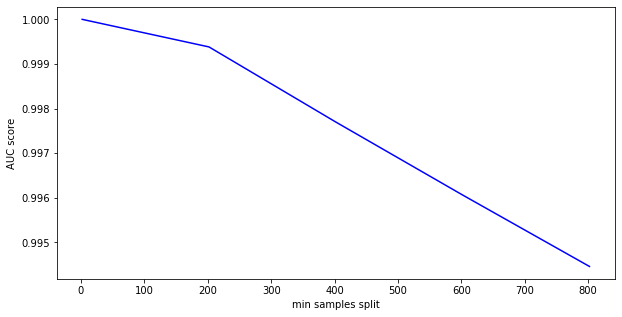

In [157]:
min_samples_splits = list(range(2, 1000, 200))
train_results = []
for min_samples_split in min_samples_splits:
    rfc = RandomForestClassifier(min_samples_split=min_samples_split)
    rfc.fit(X_train_smote, y_train_smote)
    train_pred = rfc.predict(X_train_smote)
    false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train_smote, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

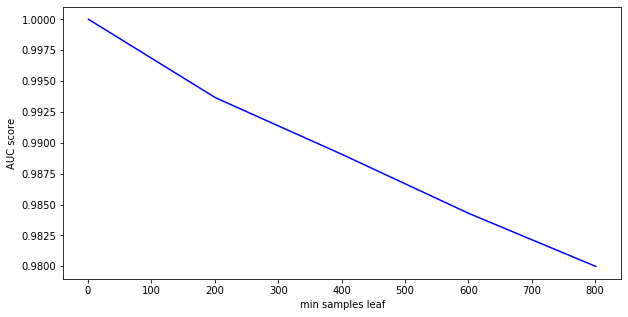

In [158]:
min_samples_leafs = list(range(1, 1000, 200))
train_results = []
for min_samples_leaf in min_samples_leafs:
    rfc = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
    rfc.fit(X_train_smote, y_train_smote)
    train_pred = rfc.predict(X_train_smote)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_smote, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

In [31]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': list(range(1, 100, 20)),
    'min_samples_leaf': list(range(1, 300, 100)),
    'min_samples_split': list(range(1, 300, 100)),
    'n_estimators': list(range(1, 300, 100)), 
    'max_features': [21, 25, 27, 29]
}

n_folds = StratifiedKFold(n_splits =3, random_state = 4)

# Create a based model
rf = RandomForestClassifier()
# Instantiate the random search model
rand_search = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                          cv = n_folds, n_jobs = -1, verbose = 1, scoring='roc_auc', random_state = 100)
# Fit the grid search to the data
rand_search.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 80.8min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=False),
                   estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [1, 21, 41, 61, 81],
                                        'max_features': [21, 25, 27, 29],
                                        'min_samples_leaf': [1, 101, 201],
                                        'min_samples_split': [1, 101, 201],
                                        'n_estimators': [1, 101, 201]},
                   random_state=100, scoring='roc_auc', verbose=1)

In [32]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',rand_search.best_score_,'using',rand_search.best_params_)

We can get accuracy of 0.9998605945739492 using {'n_estimators': 201, 'min_samples_split': 201, 'min_samples_leaf': 1, 'max_features': 29, 'max_depth': 61}


In [117]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=61,
                             min_samples_leaf=1, 
                             min_samples_split=201,
                             max_features=29,
                             n_estimators=201,
                             random_state = 100)

In [118]:
# fit
rfc.fit(X_train_smote,y_train_smote)

RandomForestClassifier(max_depth=61, max_features=29, min_samples_split=201,
                       n_estimators=201, random_state=100)

In [119]:
# predict on train data
y_train_pred = rfc.predict(X_train_smote)

# create confusion matrix
rfc_train_smote_tune_cm = confusion_matrix(y_train_smote, y_train_pred)
print(rfc_train_smote_tune_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train_smote, y_train_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 3), "\n", "Specificity: \t", round(specificity, 3), sep='')

# check area under curve
y_train_pred_prob = rfc.predict_proba(X_train_smote)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_train_smote, y_train_pred_prob),2))
auc_score_train.update({'Random_forest_smote_tune' : round(roc_auc_score(y_train_smote, y_train_pred_prob),3)})
print(classification_report(y_train_smote, y_train_pred))

[[198819    201]
 [   979 198041]]
Sensitivity: 	0.995
Specificity: 	0.999
AUC:    	 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199020

    accuracy                           1.00    398040
   macro avg       1.00      1.00      1.00    398040
weighted avg       1.00      1.00      1.00    398040



In [120]:
# predict on test data
y_pred = rfc.predict(X_test)

# create onfusion matrix
rfc_test_smote_tune_cm = confusion_matrix(y_test, y_pred)
print(rfc_test_smote_tune_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rfc.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))
auc_score_test.update({'Random_forest_smote_tune' : round(roc_auc_score(y_test, y_pred_prob),3)})
print(classification_report(y_test,y_pred))

[[85136   159]
 [   28   120]]
Sensitivity: 	0.81
Specificity: 	1.0
AUC:    	 0.96
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.43      0.81      0.56       148

    accuracy                           1.00     85443
   macro avg       0.71      0.90      0.78     85443
weighted avg       1.00      1.00      1.00     85443



Top var = 14
2nd Top var = 4
3rd Top var = 8


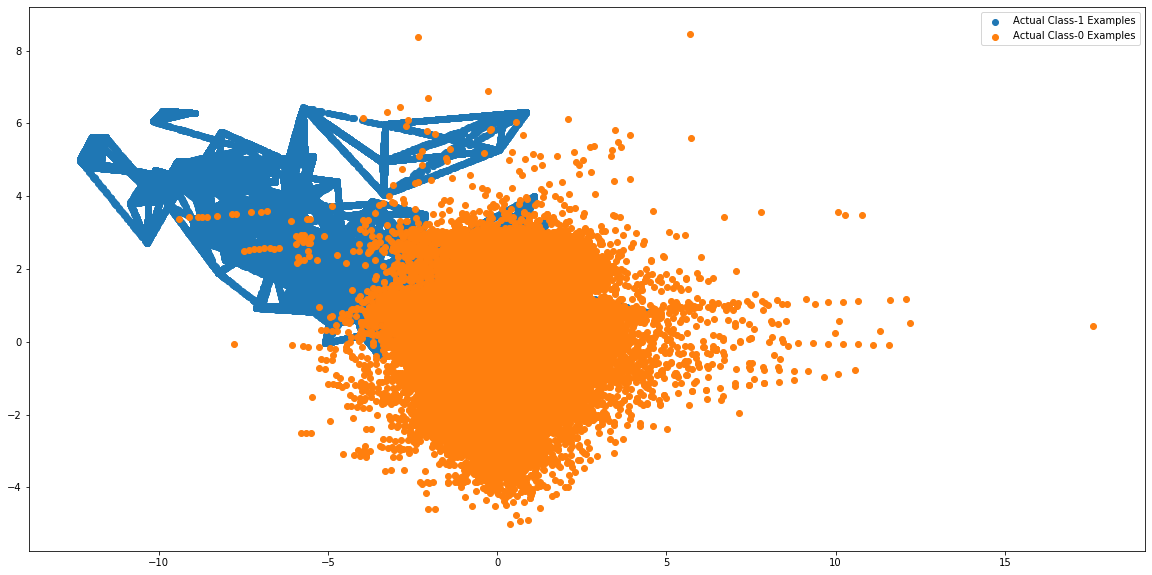

In [121]:
var_imp = []
for i in rfc.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(rfc.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(rfc.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(rfc.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(rfc.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(rfc.feature_importances_)[-2])

X_train_1 = X_train_smote.to_numpy()[np.where(y_train_smote==1.0)]
X_train_0 = X_train_smote.to_numpy()[np.where(y_train_smote==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## XGboost

In [122]:
from xgboost import XGBClassifier

In [123]:
xgbc = XGBClassifier()
xgbc.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [124]:
# predict on train data
y_train_pred = xgbc.predict(X_train_smote)

# create confusion matrix
xgbc_train_smote_cm = confusion_matrix(y_train_smote, y_train_pred)
print(xgbc_train_smote_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train_smote, y_train_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 3), "\n", "Specificity: \t", round(specificity, 3), sep='')

# check area under curve
y_train_pred_prob = xgbc.predict_proba(X_train_smote)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_train_smote, y_train_pred_prob),2))
auc_score_train.update({'Xgboost_smote' : round(roc_auc_score(y_train_smote, y_train_pred_prob),3)})
print(classification_report(y_train_smote, y_train_pred))

[[199020      0]
 [     0 199020]]
Sensitivity: 	1.0
Specificity: 	1.0
AUC:    	 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199020

    accuracy                           1.00    398040
   macro avg       1.00      1.00      1.00    398040
weighted avg       1.00      1.00      1.00    398040



In [125]:
# predict on test data
y_pred = xgbc.predict(X_test)

# create onfusion matrix
xgbc_test_smote_cm = confusion_matrix(y_test, y_pred)
print(xgbc_test_smote_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = xgbc.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))
auc_score_test.update({'Xgboost_smote' : round(roc_auc_score(y_test, y_pred_prob),3)})
print(classification_report(y_test,y_pred))

[[85259    36]
 [   25   123]]
Sensitivity: 	0.83
Specificity: 	1.0
AUC:    	 0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.77      0.83      0.80       148

    accuracy                           1.00     85443
   macro avg       0.89      0.92      0.90     85443
weighted avg       1.00      1.00      1.00     85443



In [97]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': list(range(1,500,100)),
    'min_child_weight': list(range(1,200,50)),
    'learning_rate' : list(np.linspace(0.01, 0.2, 10)),
    'n_estimators' : [150, 250, 350, 450, 550]
}

n_folds = StratifiedKFold(n_splits = 3, random_state = 4)

# Create a based model
xgbc = XGBClassifier()
# Instantiate the random search model
rand_search = RandomizedSearchCV(estimator = xgbc, param_distributions = param_grid, 
                          cv = n_folds, n_jobs = -1, verbose = 1, scoring='roc_auc', random_state = 100)
# Fit the grid search to the data
rand_search.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 119.3min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=False),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None,...
                   param_distributions={'learning_rate': [0.01,
                                                          0.03111111111111111,
                                                          0.052222222222222225,
                                             

In [98]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',rand_search.best_score_,'using',rand_search.best_params_)

We can get accuracy of 0.9999924547375901 using {'n_estimators': 550, 'min_child_weight': 1, 'max_depth': 201, 'learning_rate': 0.2}


In [126]:
xgbc = XGBClassifier(n_estimators=550, 
                     min_child_weight=1,
                     max_depth=201,
                     learning_rate=0.2,
                     random_state=100)
xgbc.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=201,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=550, n_jobs=0, num_parallel_tree=1, random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [127]:
# predict on train data
y_train_pred = xgbc.predict(X_train_smote)

# create confusion matrix
xgbc_train_smote_tune_cm = confusion_matrix(y_train_smote, y_train_pred)
print(xgbc_train_smote_tune_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train_smote, y_train_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 3), "\n", "Specificity: \t", round(specificity, 3), sep='')

# check area under curve
y_train_pred_prob = xgbc.predict_proba(X_train_smote)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_train_smote, y_train_pred_prob),2))
auc_score_train.update({'Xgboost_smote_tune' : round(roc_auc_score(y_train_smote, y_train_pred_prob),3)})
print(classification_report(y_train_smote, y_train_pred))

[[199020      0]
 [     0 199020]]
Sensitivity: 	1.0
Specificity: 	1.0
AUC:    	 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199020

    accuracy                           1.00    398040
   macro avg       1.00      1.00      1.00    398040
weighted avg       1.00      1.00      1.00    398040



In [128]:
# predict on test data
y_pred = xgbc.predict(X_test)

# create confusion matrix
xgbc_test_smote_tune_cm = confusion_matrix(y_test, y_pred)
print(xgbc_test_smote_tune_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = xgbc.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))
auc_score_test.update({'Xgboost_smote_tune' : round(roc_auc_score(y_test, y_pred_prob),3)})
print(classification_report(y_test,y_pred))

[[85261    34]
 [   24   124]]
Sensitivity: 	0.84
Specificity: 	1.0
AUC:    	 0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.78      0.84      0.81       148

    accuracy                           1.00     85443
   macro avg       0.89      0.92      0.91     85443
weighted avg       1.00      1.00      1.00     85443



Top var = 14
2nd Top var = 4
3rd Top var = 8


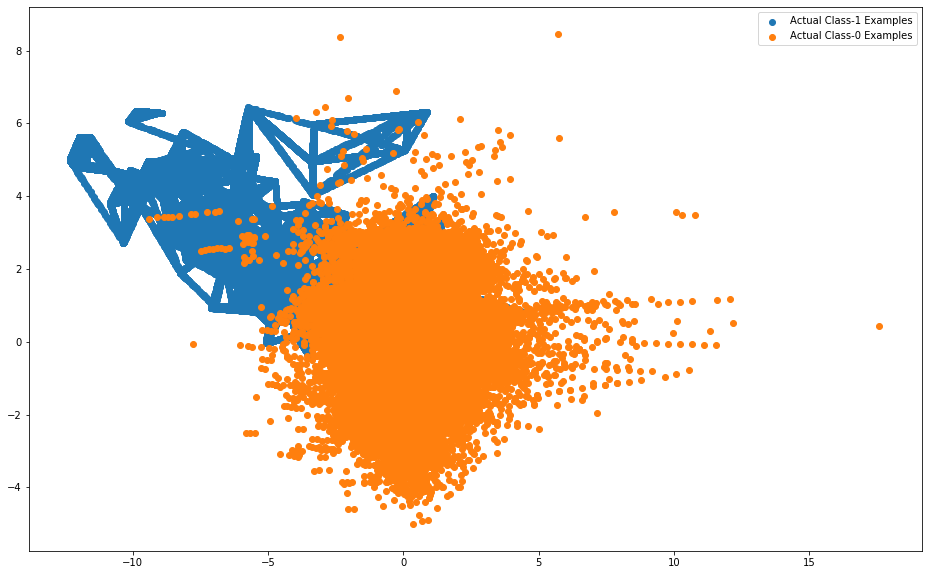

In [129]:
var_imp = []
for i in xgbc.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgbc.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgbc.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgbc.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgbc.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgbc.feature_importances_)[-2])

X_train_1 = X_train_smote.to_numpy()[np.where(y_train_smote==1.0)]
X_train_0 = X_train_smote.to_numpy()[np.where(y_train_smote==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 10]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

### Print the class distribution after applying ADASYN

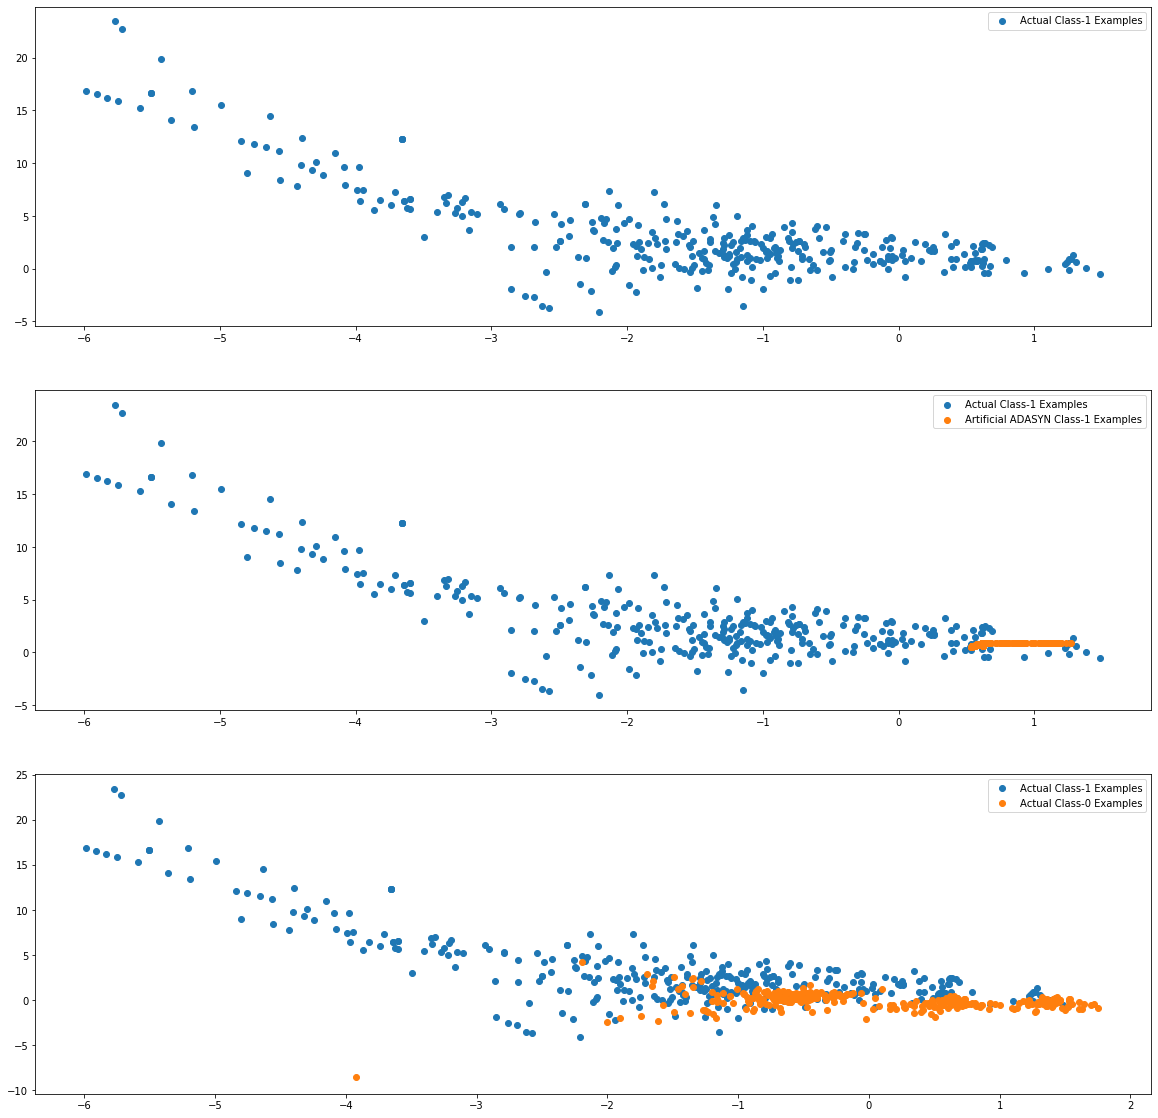

In [130]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=100)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do

X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [131]:
print('Original dataset shape %s' % Counter(y_train))
print('Resampled dataset shape %s' % Counter(y_train_adasyn))

Original dataset shape Counter({0: 199020, 1: 344})
Resampled dataset shape Counter({0: 199020, 1: 198976})


## Logistic Regression 

In [132]:
# create pipeline
steps = [("logistic", LogisticRegression())]
pipeline = Pipeline(steps)

In [133]:
# fit model
pipeline.fit(X_train_adasyn, y_train_adasyn)

# check score on train data
pipeline.score(X_train_adasyn, y_train_adasyn)

0.8980492266253932

In [134]:
# predict on train data
y_train_pred = pipeline.predict(X_train_adasyn)

# create confusion matrix
lr_train_ada_cm = confusion_matrix(y_train_adasyn, y_train_pred)
print(lr_train_ada_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train_adasyn, y_train_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 3), "\n", "Specificity: \t", round(specificity, 3), sep='')

# check area under curve
y_train_pred_prob = pipeline.predict_proba(X_train_adasyn)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_train_adasyn, y_train_pred_prob),2))
auc_score_train.update({'Logestic_ada' : round(roc_auc_score(y_train_adasyn, y_train_pred_prob),3)})
print(classification_report(y_train_adasyn, y_train_pred))

[[181302  17718]
 [ 22858 176118]]
Sensitivity: 	0.885
Specificity: 	0.911
AUC:    	 0.97
              precision    recall  f1-score   support

           0       0.89      0.91      0.90    199020
           1       0.91      0.89      0.90    198976

    accuracy                           0.90    397996
   macro avg       0.90      0.90      0.90    397996
weighted avg       0.90      0.90      0.90    397996



In [135]:
# predict on test data
y_pred = pipeline.predict(X_test)

# create confusion matrix
lr_test_ada_cm = confusion_matrix(y_test, y_pred)
print(lr_test_ada_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))
auc_score_test.update({'Logestic_ada' : round(roc_auc_score(y_test, y_pred_prob),3)})
print(classification_report(y_test,y_pred))

[[77790  7505]
 [   10   138]]
Sensitivity: 	0.93
Specificity: 	0.91
AUC:    	 0.98
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     85295
           1       0.02      0.93      0.04       148

    accuracy                           0.91     85443
   macro avg       0.51      0.92      0.49     85443
weighted avg       1.00      0.91      0.95     85443



## Hyperparameter tunning

In [136]:
# logistic regression 
logistic = LogisticRegression()

# create pipeline
steps = [("logistic", logistic)]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': list(np.linspace(0.0001, 0.0009, 20)), 'logistic__penalty': ['l1', 'l2'], 'logistic__solver' : ['lbfgs','saga']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc')

In [137]:
# fit model
model.fit(X_train_adasyn, y_train_adasyn)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=False),
             estimator=Pipeline(steps=[('logistic', LogisticRegression())]),
             param_grid={'logistic__C': [0.0001, 0.00014210526315789474,
                                         0.00018421052631578948,
                                         0.00022631578947368417,
                                         0.0002684210526315789,
                                         0.00031052631578947366,
                                         0.00035263157894736835,
                                         0.0003947368421052631,
                                         0.00043684210526315784,
                                         0.0004789473684210526,
                                         0.0005210526315789474,
                                         0.000563157894736842,
                                         0.0006052631578947368,
                                         0.0006473684210526315,
  

In [138]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9489233693263518
Best hyperparameters:  {'logistic__C': 0.000563157894736842, 'logistic__penalty': 'l1', 'logistic__solver': 'saga'}


In [139]:
logistic = LogisticRegression(C = 0.000563157894736842, penalty = 'l1', solver = 'saga')
# fit model
logistic.fit(X_train_adasyn, y_train_adasyn)

LogisticRegression(C=0.000563157894736842, penalty='l1', solver='saga')

In [140]:
# predict on train data
y_train_pred = logistic.predict(X_train_adasyn)

# create confusion matrix
lr_train_ada_tune_cm = confusion_matrix(y_train_adasyn, y_train_pred)
print(lr_train_ada_tune_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train_adasyn, y_train_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 3), "\n", "Specificity: \t", round(specificity, 3), sep='')

# check area under curve
y_train_pred_prob = logistic.predict_proba(X_train_adasyn)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_train_adasyn, y_train_pred_prob),2))
auc_score_train.update({'Logestic_ada_tune' : round(roc_auc_score(y_train_adasyn, y_train_pred_prob),3)})
print(classification_report(y_train_adasyn, y_train_pred))

[[182094  16926]
 [ 26608 172368]]
Sensitivity: 	0.866
Specificity: 	0.915
AUC:    	 0.96
              precision    recall  f1-score   support

           0       0.87      0.91      0.89    199020
           1       0.91      0.87      0.89    198976

    accuracy                           0.89    397996
   macro avg       0.89      0.89      0.89    397996
weighted avg       0.89      0.89      0.89    397996



In [141]:
# predict on test data
y_pred = logistic.predict(X_test)

# create onfusion matrix
lr_test_ada_tune_cm = confusion_matrix(y_test, y_pred)
print(lr_test_ada_tune_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = logistic.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))
auc_score_test.update({'Logestic_ada_tune' : round(roc_auc_score(y_test, y_pred_prob),3)})
print(classification_report(y_test,y_pred))

[[78148  7147]
 [   10   138]]
Sensitivity: 	0.93
Specificity: 	0.92
AUC:    	 0.98
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     85295
           1       0.02      0.93      0.04       148

    accuracy                           0.92     85443
   macro avg       0.51      0.92      0.50     85443
weighted avg       1.00      0.92      0.95     85443



## Decision tree

In [142]:
from sklearn.tree import DecisionTreeClassifier
# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=5)

In [143]:
# predict on train data
y_train_pred = dt.predict(X_train_adasyn)

# create confusion matrix
dt_train_ada_cm = confusion_matrix(y_train_adasyn, y_train_pred)
print(dt_train_ada_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train_adasyn, y_train_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 3), "\n", "Specificity: \t", round(specificity, 3), sep='')

# check area under curve
y_train_pred_prob = dt.predict_proba(X_train_adasyn)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_train_adasyn, y_train_pred_prob),2))
auc_score_train.update({'Decision_tree_ada' : round(roc_auc_score(y_train_adasyn, y_train_pred_prob),3)})
print(classification_report(y_train_adasyn, y_train_pred))

[[183124  15896]
 [ 12909 186067]]
Sensitivity: 	0.935
Specificity: 	0.92
AUC:    	 0.97
              precision    recall  f1-score   support

           0       0.93      0.92      0.93    199020
           1       0.92      0.94      0.93    198976

    accuracy                           0.93    397996
   macro avg       0.93      0.93      0.93    397996
weighted avg       0.93      0.93      0.93    397996



In [144]:
# predict on test data
y_pred = dt.predict(X_test)

# create onfusion matrix
dt_test_ada_cm = confusion_matrix(y_test, y_pred)
print(dt_test_ada_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 3), "\n", "Specificity: \t", round(specificity, 3), sep='')

# check area under curve
y_pred_prob = dt.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))
auc_score_test.update({'Decision_tree_ada' : round(roc_auc_score(y_test, y_pred_prob),3)})
print(classification_report(y_test, y_pred))

[[78625  6670]
 [   18   130]]
Sensitivity: 	0.878
Specificity: 	0.922
AUC:    	 0.93
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     85295
           1       0.02      0.88      0.04       148

    accuracy                           0.92     85443
   macro avg       0.51      0.90      0.50     85443
weighted avg       1.00      0.92      0.96     85443



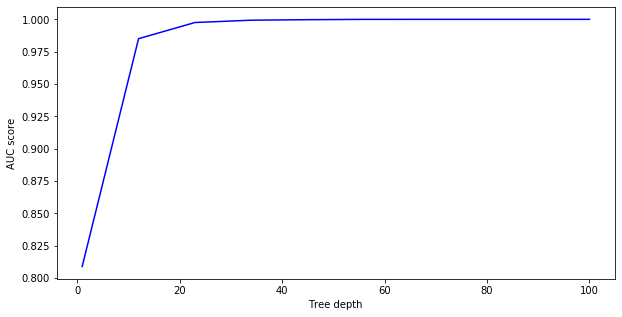

In [55]:
from sklearn.metrics import roc_curve, auc
plt.rcParams['figure.figsize'] = [10, 5]
max_depths = np.linspace(1, 100, 10, endpoint=True)
train_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train_adasyn, y_train_adasyn)
    train_pred = dt.predict(X_train_adasyn)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_adasyn, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

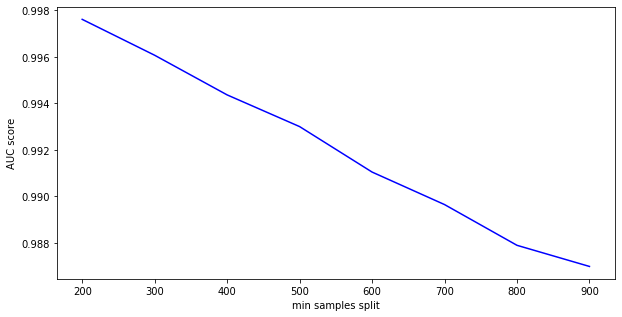

In [56]:
min_samples_splits = list(range(200, 1000, 100))
train_results = []
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
    dt.fit(X_train_adasyn, y_train_adasyn)
    train_pred = dt.predict(X_train_adasyn)
    false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train_adasyn, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

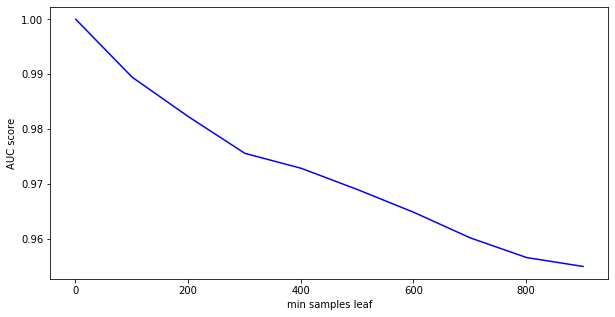

In [57]:
min_samples_leafs = list(range(1, 1000, 100))
train_results = []
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    dt.fit(X_train_adasyn, y_train_adasyn)
    train_pred = dt.predict(X_train_adasyn)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_adasyn, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

In [58]:
# Create the parameter grid 
param_grid = {
    'max_depth': list(range(1, 100, 10)),
    'min_samples_leaf': list(range(1, 1000, 100)),
    'min_samples_split': list(range(1, 1000, 100)),
    'criterion': ["entropy", "gini"]
}

n_folds = StratifiedKFold(n_splits = 5, random_state = 4)

# Instantiate the random search model
dtree = DecisionTreeClassifier()
rand_search = RandomizedSearchCV(estimator = dtree, param_distributions = param_grid, 
                          cv = n_folds, n_jobs = -1, verbose = 1, scoring='roc_auc', random_state = 100)

# Fit the grid search to the data
rand_search.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.8min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=False),
                   estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [1, 11, 21, 31, 41, 51, 61,
                                                      71, 81, 91],
                                        'min_samples_leaf': [1, 101, 201, 301,
                                                             401, 501, 601, 701,
                                                             801, 901],
                                        'min_samples_split': [1, 101, 201, 301,
                                                              401, 501, 601,
                                                              701, 801, 901]},
                   random_state=100, scoring='roc_auc', verbose=1)

In [59]:
# cv results
cv_results = pd.DataFrame(rand_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,46.292374,3.959002,0.088654,0.026159,401,401,51,gini,"{'min_samples_split': 401, 'min_samples_leaf':...",0.917695,0.926499,0.980321,0.953198,0.962794,0.948101,0.023114,7
1,46.443634,4.599661,0.085066,0.020226,201,901,71,entropy,"{'min_samples_split': 201, 'min_samples_leaf':...",0.934867,0.976792,0.978684,0.972700,0.975646,0.967738,0.016550,1
2,45.233474,4.992741,0.113052,0.027589,901,501,81,gini,"{'min_samples_split': 901, 'min_samples_leaf':...",0.923024,0.939062,0.978815,0.961917,0.956610,0.951886,0.019212,5
3,55.531735,4.556566,0.114052,0.011578,501,901,81,gini,"{'min_samples_split': 501, 'min_samples_leaf':...",0.943340,0.957511,0.983300,0.955185,0.973155,0.962498,0.014083,2
4,61.660819,10.584014,0.085244,0.011186,901,701,81,gini,"{'min_samples_split': 901, 'min_samples_leaf':...",0.940509,0.936134,0.977484,0.956444,0.972798,0.956674,0.016591,3
5,7.608501,0.715755,0.096920,0.023619,901,701,1,entropy,"{'min_samples_split': 901, 'min_samples_leaf':...",0.729475,0.772979,0.778450,0.769417,0.792774,0.768619,0.021128,8
6,41.827097,3.461896,0.073181,0.002455,801,601,91,gini,"{'min_samples_split': 801, 'min_samples_leaf':...",0.922776,0.935954,0.977251,0.951426,0.961541,0.949790,0.019058,6
7,0.438896,0.049537,0.000000,0.000000,1,301,91,gini,"{'min_samples_split': 1, 'min_samples_leaf': 3...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
8,0.421389,0.046857,0.000000,0.000000,1,501,31,entropy,"{'min_samples_split': 1, 'min_samples_leaf': 5...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
9,31.979893,7.508348,0.044103,0.008508,201,701,91,gini,"{'min_samples_split': 201, 'min_samples_leaf':...",0.931710,0.941941,0.976125,0.951432,0.971842,0.954610,0.017058,4


In [60]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", rand_search.best_score_)
print(rand_search.best_estimator_)

best accuracy 0.9677377825874712
DecisionTreeClassifier(criterion='entropy', max_depth=71, min_samples_leaf=901,
                       min_samples_split=201)


In [145]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion='entropy',
                                  random_state = 100,
                                  max_depth=71, 
                                  min_samples_leaf=901,
                                  min_samples_split=201)
clf_gini.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(criterion='entropy', max_depth=71, min_samples_leaf=901,
                       min_samples_split=201, random_state=100)

In [146]:
# predict on train data
y_train_pred = clf_gini.predict(X_train_adasyn)

# create confusion matrix
dt_train_ada_tune_cm = confusion_matrix(y_train_adasyn, y_train_pred)
print(dt_train_ada_tune_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train_adasyn, y_train_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 3), "\n", "Specificity: \t", round(specificity, 3), sep='')

# check area under curve
y_train_pred_prob = clf_gini.predict_proba(X_train_adasyn)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_train_adasyn, y_train_pred_prob),2))
auc_score_train.update({'Decision_tree_ada_tune' : round(roc_auc_score(y_train_adasyn, y_train_pred_prob),3)})
print(classification_report(y_train_adasyn, y_train_pred))

[[190600   8420]
 [  5347 193629]]
Sensitivity: 	0.973
Specificity: 	0.958
AUC:    	 1.0
              precision    recall  f1-score   support

           0       0.97      0.96      0.97    199020
           1       0.96      0.97      0.97    198976

    accuracy                           0.97    397996
   macro avg       0.97      0.97      0.97    397996
weighted avg       0.97      0.97      0.97    397996



In [147]:
# accuracy score
clf_gini.score(X_test,y_test)

0.9562983509474152

In [148]:
# predict on test data
y_pred = clf_gini.predict(X_test)

# create confusion matrix
dt_test_ada_tune_cm = confusion_matrix(y_test, y_pred)
print(dt_test_ada_tune_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 3), "\n", "Specificity: \t", round(specificity, 3), sep='')

# check area under curve
y_pred_prob = clf_gini.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))
auc_score_test.update({'Decision_tree_ada_tune' : round(roc_auc_score(y_test, y_pred_prob),3)})
print(classification_report(y_test, y_pred))

[[81578  3717]
 [   17   131]]
Sensitivity: 	0.885
Specificity: 	0.956
AUC:    	 0.94
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85295
           1       0.03      0.89      0.07       148

    accuracy                           0.96     85443
   macro avg       0.52      0.92      0.52     85443
weighted avg       1.00      0.96      0.98     85443



Top var = 14
2nd Top var = 4
3rd Top var = 7


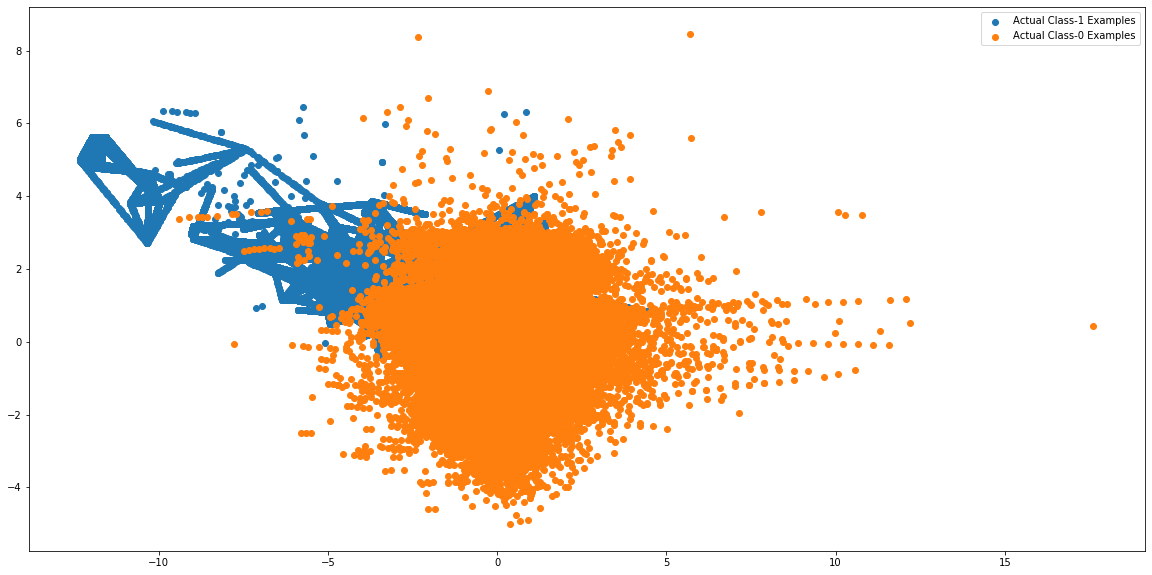

In [149]:
var_imp = []
for i in clf_gini.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf_gini.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf_gini.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf_gini.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf_gini.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf_gini.feature_importances_)[-2])

X_train_1 = X_train_adasyn.to_numpy()[np.where(y_train_adasyn==1.0)]
X_train_0 = X_train_adasyn.to_numpy()[np.where(y_train_adasyn==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Random Forest

In [150]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [151]:
# fit model
rfc.fit(X_train_adasyn, y_train_adasyn)

RandomForestClassifier()

In [152]:
# predict on train data
y_train_pred = rfc.predict(X_train_adasyn)

# create confusion matrix
rfc_train_ada_cm = confusion_matrix(y_train_adasyn, y_train_pred)
print(rfc_train_ada_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train_adasyn, y_train_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 3), "\n", "Specificity: \t", round(specificity, 3), sep='')

# check area under curve
y_train_pred_prob = rfc.predict_proba(X_train_adasyn)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_train_adasyn, y_train_pred_prob),2))
auc_score_train.update({'Random_forest_ada' : round(roc_auc_score(y_train_adasyn, y_train_pred_prob),3)})
print(classification_report(y_train_adasyn, y_train_pred))

[[199020      0]
 [     0 198976]]
Sensitivity: 	1.0
Specificity: 	1.0
AUC:    	 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    198976

    accuracy                           1.00    397996
   macro avg       1.00      1.00      1.00    397996
weighted avg       1.00      1.00      1.00    397996



In [153]:
# predict on test data
y_pred = rfc.predict(X_test)

# create confusion matrix
rfc_test_ada_cm = confusion_matrix(y_test, y_pred)
print(rfc_test_ada_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rfc.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))
auc_score_test.update({'Random_forest_ada' : round(roc_auc_score(y_test, y_pred_prob),3)})
print(classification_report(y_test,y_pred))

[[85275    20]
 [   28   120]]
Sensitivity: 	0.81
Specificity: 	1.0
AUC:    	 0.97
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.86      0.81      0.83       148

    accuracy                           1.00     85443
   macro avg       0.93      0.91      0.92     85443
weighted avg       1.00      1.00      1.00     85443



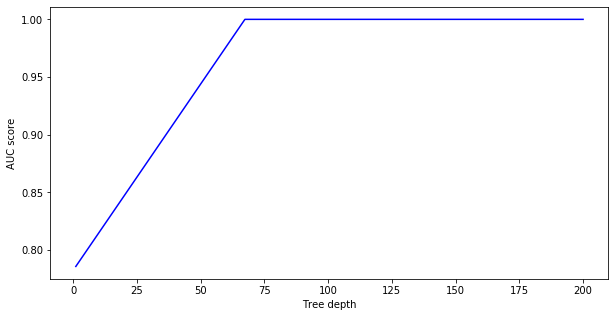

In [37]:
from sklearn.metrics import roc_curve, auc
plt.rcParams['figure.figsize'] = [10, 5]
max_depths = np.linspace(1, 200, 4, endpoint=True)
train_results = []
for max_depth in max_depths:
    rfc = RandomForestClassifier(max_depth=max_depth)
    rfc.fit(X_train_adasyn, y_train_adasyn)
    train_pred = rfc.predict(X_train_adasyn)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_adasyn, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

Checking the auc score at different depths on the train data to find the optimal depth

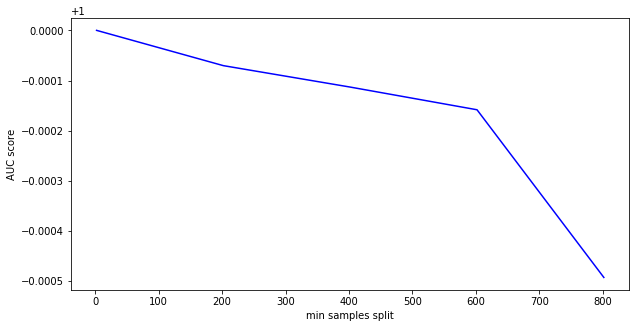

In [38]:
min_samples_splits = list(range(2, 1000, 200))
train_results = []
for min_samples_split in min_samples_splits:
    rfc = RandomForestClassifier(min_samples_split=min_samples_split)
    rfc.fit(X_train_adasyn, y_train_adasyn)
    train_pred = rfc.predict(X_train_adasyn)
    false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train_adasyn, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

Checking the auc score at different sample leaf split on the train data to find the optimal sample leaf split

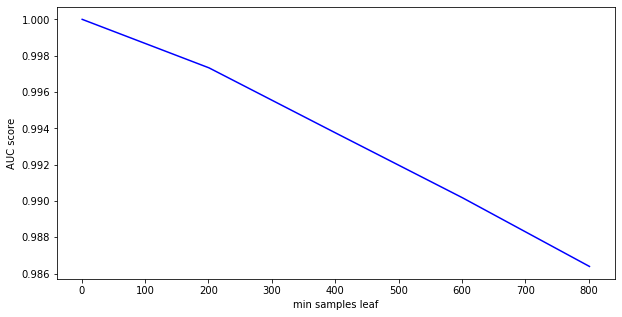

In [39]:
min_samples_leafs = list(range(1, 1000, 200))
train_results = []
for min_samples_leaf in min_samples_leafs:
    rfc = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
    rfc.fit(X_train_adasyn, y_train_adasyn)
    train_pred = rfc.predict(X_train_adasyn)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_adasyn, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

Checking the auc score at different min sample leaf on the train data to find the min sample leaf

In [36]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': list(range(1, 100, 20)),
    'min_samples_leaf': list(range(1, 100, 20)),
    'min_samples_split': list(range(1, 100, 20)),
    'n_estimators': [200, 400, 600, 800, 1000], 
    'max_features': [15, 20, 25, 29]
}

n_folds = StratifiedKFold(n_splits =3, random_state = 4)

# Create a based model
rf = RandomForestClassifier()
# Instantiate the random search model
rand_search = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                          cv = n_folds, n_jobs = -1, verbose = 1, scoring='roc_auc', random_state = 100)
# Fit the grid search to the data
rand_search.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 386.5min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=False),
                   estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [1, 21, 41, 61, 81],
                                        'max_features': [15, 20, 25, 29],
                                        'min_samples_leaf': [1, 21, 41, 61, 81],
                                        'min_samples_split': [1, 21, 41, 61,
                                                              81],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=100, scoring='roc_auc', verbose=1)

In [37]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',rand_search.best_score_,'using',rand_search.best_params_)

We can get accuracy of 0.9906465767656192 using {'n_estimators': 1000, 'min_samples_split': 61, 'min_samples_leaf': 21, 'max_features': 15, 'max_depth': 61}


In [154]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=61,
                             min_samples_leaf=21, 
                             min_samples_split=61,
                             max_features=15,
                             n_estimators=1000,
                             random_state = 100)

In [155]:
# fit
rfc.fit(X_train_adasyn,y_train_adasyn)

RandomForestClassifier(max_depth=61, max_features=15, min_samples_leaf=21,
                       min_samples_split=61, n_estimators=1000,
                       random_state=100)

In [156]:
# predict on train data
y_train_pred = rfc.predict(X_train_adasyn)

# create confusion matrix
rfc_train_ada_tune_cm = confusion_matrix(y_train_adasyn, y_train_pred)
print(rfc_train_ada_tune_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train_adasyn, y_train_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 3), "\n", "Specificity: \t", round(specificity, 3), sep='')

# check area under curve
y_train_pred_prob = rfc.predict_proba(X_train_adasyn)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_train_adasyn, y_train_pred_prob),2))
auc_score_train.update({'Random_forest_ada_tune' : round(roc_auc_score(y_train_adasyn, y_train_pred_prob),3)})
print(classification_report(y_train_adasyn, y_train_pred))

[[198817    203]
 [    11 198965]]
Sensitivity: 	1.0
Specificity: 	0.999
AUC:    	 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    198976

    accuracy                           1.00    397996
   macro avg       1.00      1.00      1.00    397996
weighted avg       1.00      1.00      1.00    397996



In [157]:
# predict on test data
y_pred = rfc.predict(X_test)

# create onfusion matrix
rfc_test_ada_tune_cm = confusion_matrix(y_test, y_pred)
print(rfc_test_ada_tune_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rfc.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))
auc_score_test.update({'Random_forest_ada_tune' : round(roc_auc_score(y_test, y_pred_prob),3)})
print(classification_report(y_test,y_pred))

[[85179   116]
 [   23   125]]
Sensitivity: 	0.84
Specificity: 	1.0
AUC:    	 0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.52      0.84      0.64       148

    accuracy                           1.00     85443
   macro avg       0.76      0.92      0.82     85443
weighted avg       1.00      1.00      1.00     85443



Top var = 4
2nd Top var = 14
3rd Top var = 10


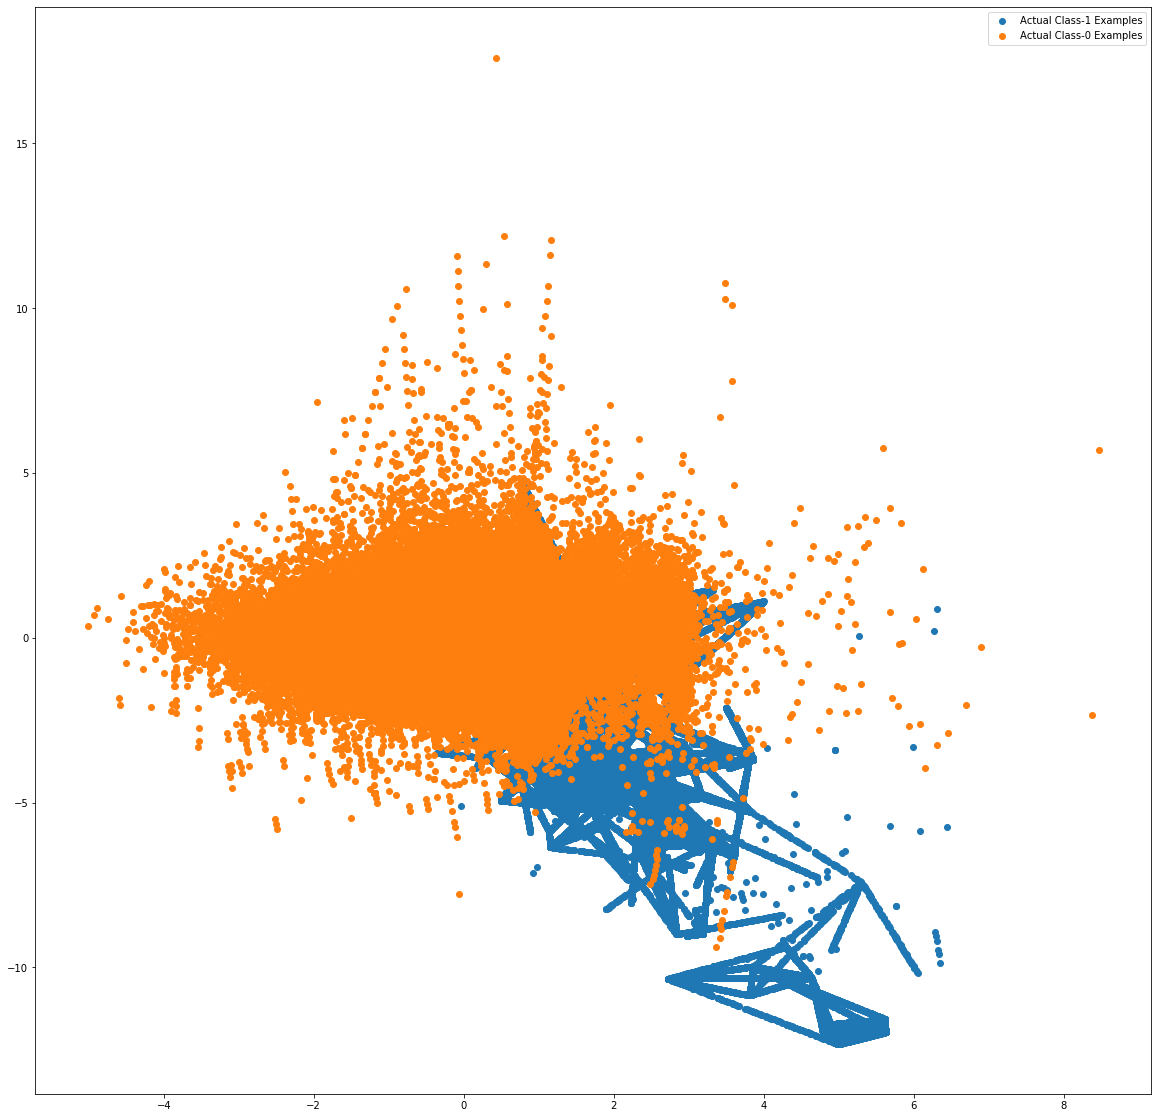

In [158]:
var_imp = []
for i in rfc.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(rfc.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(rfc.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(rfc.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(rfc.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(rfc.feature_importances_)[-2])

X_train_1 = X_train_adasyn.to_numpy()[np.where(y_train_adasyn==1.0)]
X_train_0 = X_train_adasyn.to_numpy()[np.where(y_train_adasyn==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## XGboost

In [159]:
from xgboost import XGBClassifier

In [160]:
xgbc = XGBClassifier()
xgbc.fit(X_train_adasyn,y_train_adasyn)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [161]:
# predict on train data
y_train_pred = xgbc.predict(X_train_adasyn)

# create confusion matrix
xgbc_train_ada_cm = confusion_matrix(y_train_adasyn, y_train_pred)
print(xgbc_train_ada_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train_adasyn, y_train_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 3), "\n", "Specificity: \t", round(specificity, 3), sep='')

# check area under curve
y_train_pred_prob = xgbc.predict_proba(X_train_adasyn)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_train_adasyn, y_train_pred_prob),2))
auc_score_train.update({'Xgboost_ada' : round(roc_auc_score(y_train_adasyn, y_train_pred_prob),3)})
print(classification_report(y_train_adasyn, y_train_pred))

[[199020      0]
 [     0 198976]]
Sensitivity: 	1.0
Specificity: 	1.0
AUC:    	 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    198976

    accuracy                           1.00    397996
   macro avg       1.00      1.00      1.00    397996
weighted avg       1.00      1.00      1.00    397996



In [162]:
# predict on test data
y_pred = xgbc.predict(X_test)

# create confusion matrix
xgbc_test_ada_cm = confusion_matrix(y_test, y_pred)
print(xgbc_test_ada_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = xgbc.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))
auc_score_test.update({'Xgboost_ada' : round(roc_auc_score(y_test, y_pred_prob),3)})
print(classification_report(y_test,y_pred))

[[85238    57]
 [   25   123]]
Sensitivity: 	0.83
Specificity: 	1.0
AUC:    	 0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.68      0.83      0.75       148

    accuracy                           1.00     85443
   macro avg       0.84      0.92      0.87     85443
weighted avg       1.00      1.00      1.00     85443



In [74]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': list(range(1, 1000, 200)),
    'min_child_weight': list(range(1, 1000, 200)),
    'learning_rate' : list(np.linspace(0.01, 0.2, 10)),
    'n_estimators' : list(range(1, 1000, 200))
}

n_folds = StratifiedKFold(n_splits = 3, random_state = 4)

# Create a based model
xgbc = XGBClassifier()
# Instantiate the random search model
rand_search = RandomizedSearchCV(estimator = xgbc, param_distributions = param_grid, 
                          cv = n_folds, n_jobs = -1, verbose = 1, scoring='roc_auc', random_state = 100)
# Fit the grid search to the data
rand_search.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 213.6min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=False),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None,...
                   param_distributions={'learning_rate': [0.01,
                                                          0.03111111111111111,
                                                          0.052222222222222225,
                                             

In [75]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',rand_search.best_score_,'using',rand_search.best_params_)

We can get accuracy of 0.9944446681287568 using {'n_estimators': 401, 'min_child_weight': 1, 'max_depth': 401, 'learning_rate': 0.1366666666666667}


In [163]:
xgbc = XGBClassifier(n_estimators=401, 
                     min_child_weight=1,
                     max_depth=401,
                     learning_rate=0.1366666666666667,
                     random_state=100)
xgbc.fit(X_train_adasyn,y_train_adasyn)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1366666666666667, max_delta_step=0, max_depth=401,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=401, n_jobs=0, num_parallel_tree=1, random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [164]:
# predict on train data
y_train_pred = xgbc.predict(X_train_adasyn)

# create confusion matrix
xgbc_train_ada_tune_cm = confusion_matrix(y_train_adasyn, y_train_pred)
print(xgbc_train_ada_tune_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train_adasyn, y_train_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 3), "\n", "Specificity: \t", round(specificity, 3), sep='')

# check area under curve
y_train_pred_prob = xgbc.predict_proba(X_train_adasyn)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_train_adasyn, y_train_pred_prob),2))
auc_score_train.update({'Xgboost_ada_tune' : round(roc_auc_score(y_train_adasyn, y_train_pred_prob),3)})
print(classification_report(y_train_adasyn, y_train_pred))

[[199020      0]
 [     0 198976]]
Sensitivity: 	1.0
Specificity: 	1.0
AUC:    	 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    198976

    accuracy                           1.00    397996
   macro avg       1.00      1.00      1.00    397996
weighted avg       1.00      1.00      1.00    397996



In [165]:
# predict on test data
y_pred = xgbc.predict(X_test)

# create confusion matrix
xgbc_test_ada_tune_cm = confusion_matrix(y_test, y_pred)
print(xgbc_test_ada_tune_cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = xgbc.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))
auc_score_test.update({'Xgboost_ada_tune' : round(roc_auc_score(y_test, y_pred_prob),3)})
print(classification_report(y_test,y_pred))

[[85262    33]
 [   27   121]]
Sensitivity: 	0.82
Specificity: 	1.0
AUC:    	 0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.79      0.82      0.80       148

    accuracy                           1.00     85443
   macro avg       0.89      0.91      0.90     85443
weighted avg       1.00      1.00      1.00     85443



Top var = 4
2nd Top var = 14
3rd Top var = 7


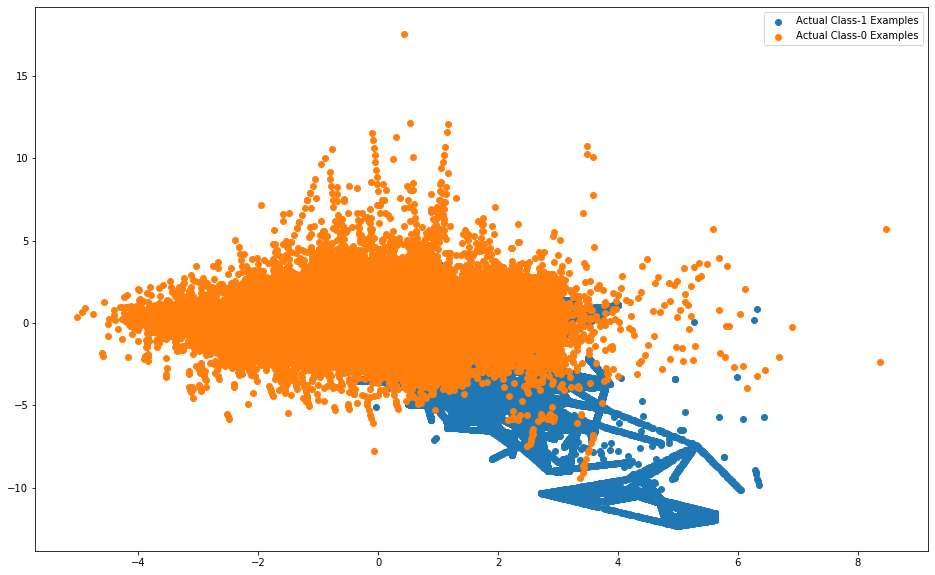

In [166]:
var_imp = []
for i in xgbc.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgbc.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgbc.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgbc.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgbc.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgbc.feature_importances_)[-2])

X_train_1 = X_train_adasyn.to_numpy()[np.where(y_train_adasyn==1.0)]
X_train_0 = X_train_adasyn.to_numpy()[np.where(y_train_adasyn==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 10]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

#### Print the FPR,TPR & select the best threshold from the roc curve

In [93]:
print('Train auc =', metrics.roc_auc_score(y_train_smote, y_train_pred_prob))
fpr, tpr, thresholds = metrics.roc_curve(y_train_smote, y_train_pred_prob)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 1.0
0.98963135


In [167]:
auc_train = pd.DataFrame(list(auc_score_train.items()), columns = ['Model Name','AUC_score'])
auc_train

,Model Name,AUC_score
0,Logestic,0.980
1,Logestic_tune,0.980
2,Decision_tree,0.920
3,Decision_tree_tune,1.000
4,Random_forest,1.000
5,Random_forest_tune,1.000
6,Xgboost,1.000
7,Xgboost_tune,1.000
8,Logestic_ros,0.990
9,Logestic_ros_tune,0.990


In [168]:
auc_test = pd.DataFrame(list(auc_score_test.items()), columns = ['Model Name','AUC_score'])
auc_test

,Model Name,AUC_score
0,Logestic,0.970
1,Logestic_tune,0.980
2,Decision_tree,0.870
3,Decision_tree_tune,0.920
4,Random_forest,0.940
5,Random_forest_tune,0.960
6,Xgboost,0.970
7,Xgboost_tune,0.980
8,Logestic_ros,0.980
9,Logestic_ros_tune,0.980


In [179]:
sen = []
spec = []
re = []
pr = []
ac = []
l = [lm_train_cm, lm_train_tune_cm, dt_train_cm, dt_train_tune_cm,rfc_train_cm, rfc_train_tune_cm,
     xgbc_train_cm, xgbc_train_tune_cm,
     lr_train_ros_cm, lr_train_ros_tune_cm, dt_train_ros_cm, dt_train_ros_tune_cm,rfc_train_ros_cm, rfc_train_ros_tune_cm,
     xgbc_train_ros_cm, xgbc_train_ros_tune_cm,
     lr_train_smote_cm, lr_train_smote_tune_cm, dt_train_smote_cm, dt_train_smote_tune_cm,rfc_train_smote_cm,
     rfc_train_smote_tune_cm,xgbc_train_smote_cm,xgbc_train_smote_tune_cm,
     lr_train_ada_cm, lr_train_ada_tune_cm, dt_train_ada_cm, dt_train_ada_tune_cm, rfc_train_ada_cm, rfc_train_ada_tune_cm,
     xgbc_train_ada_cm, xgbc_train_ada_tune_cm]
for i in l :
    TP = i[1,1] # true positive 
    TN = i[0,0] # true negatives
    FP = i[0,1] # false positives
    FN = i[1,0] # false negatives
    #print('Accuracy Score : ',accuracy_score(y_test,predictions))
    acc = ((TN+TP)/(TP+TN+FP+FN))
    ac.append(acc)
    # Let's see the sensitivity of our classification model
    s = (TP / float(TP+FN))
    sen.append(s)
    # Let us calculate specificity
    sp = (TN / float(TN+FP))
    spec.append(sp)
    # Calculate recall
    r = (TP / float(TP+FN))
    re.append(r)
    # Calculate Precision
    p = (TP / float(TP+FP))
    pr.append(p)

In [180]:
sens = []
spe = []
rec = []
pre = []
accu = []
t = [lm_test_cm, lm_test_tune_cm,dt_test_cm, dt_test_tune_cm, rfc_test_cm, rfc_test_tune_cm, 
     xgbc_test_cm, xgbc_test_tune_cm,
     lr_test_ros_cm, lr_test_ros_tune_cm,dt_test_ros_cm, dt_test_ros_tune_cm,rfc_test_ros_cm,rfc_test_ros_tune_cm, 
     xgbc_test_ros_cm, xgbc_test_ros_tune_cm,
     lr_test_smote_cm, lr_test_smote_tune_cm, dt_test_smote_cm,dt_test_smote_tune_cm,rfc_test_smote_cm,
     rfc_test_smote_tune_cm, xgbc_test_smote_cm,xgbc_test_smote_tune_cm,
     lr_test_ada_cm, lr_test_ada_tune_cm,dt_test_ada_cm, dt_test_ada_tune_cm,rfc_test_ada_cm, rfc_test_ada_tune_cm,
     xgbc_test_ada_cm, xgbc_test_ada_tune_cm]
for i in t :
    TP = i[1,1] # true positive 
    TN = i[0,0] # true negatives
    FP = i[0,1] # false positives
    FN = i[1,0] # false negatives
    #print('Accuracy Score : ',accuracy_score(y_test,predictions))
    acc = ((TN+TP)/(TP+TN+FP+FN))
    accu.append(acc)
    # Let's see the sensitivity of our classification model
    s = (TP / float(TP+FN))
    sens.append(s)
    # Let us calculate specificity
    sp = (TN / float(TN+FP))
    spe.append(sp)
    # Calculate recall
    r = (TP / float(TP+FN))
    rec.append(r)
    # Calculate Precision
    p = (TP / float(TP+FP))
    pre.append(p)

In [181]:
train_model = pd.DataFrame({'Accuracy': ac, 'Sensitivity': sen, 'Specificity': spec, 'Recall' : re, 'Precision' : pr})
train_model

,Accuracy,Sensitivity,Specificity,Recall,Precision
0,0.999293,0.674419,0.999854,0.674419,0.888889
1,0.999283,0.651163,0.999884,0.651163,0.906883
2,0.999649,0.828488,0.999945,0.828488,0.962838
3,0.999664,0.851744,0.999920,0.851744,0.948220
4,1.000000,1.000000,1.000000,1.000000,1.000000
5,0.999182,0.668605,0.999754,0.668605,0.824373
6,1.000000,1.000000,1.000000,1.000000,1.000000
7,0.999834,0.904070,1.000000,0.904070,1.000000
8,0.953216,0.932107,0.974324,0.932107,0.973192
9,0.953208,0.932107,0.974309,0.932107,0.973177


In [182]:
test_model = pd.DataFrame({'Accuracy': accu, 'Sensitivity': sens, 'Specificity': spe, 'Recall' : rec, 'Precision' : pre})
test_model

,Accuracy,Sensitivity,Specificity,Recall,Precision
0,0.999134,0.621622,0.999789,0.621622,0.836364
1,0.999099,0.581081,0.999824,0.581081,0.851485
2,0.999368,0.756757,0.999789,0.756757,0.861538
3,0.999333,0.750000,0.999766,0.750000,0.847328
4,0.999473,0.750000,0.999906,0.750000,0.932773
5,0.998982,0.655405,0.999578,0.655405,0.729323
6,0.999532,0.783784,0.999906,0.783784,0.935484
7,0.999473,0.783784,0.999848,0.783784,0.899225
8,0.974158,0.891892,0.974301,0.891892,0.056799
9,0.974182,0.891892,0.974324,0.891892,0.056848


## Models Comparison

In [185]:
Fnl_train_model = pd.concat([auc_train, train_model], axis=1)
Fnl_train_model

,Model Name,AUC_score,Accuracy,Sensitivity,Specificity,Recall,Precision
0,Logestic,0.980,0.999293,0.674419,0.999854,0.674419,0.888889
1,Logestic_tune,0.980,0.999283,0.651163,0.999884,0.651163,0.906883
2,Decision_tree,0.920,0.999649,0.828488,0.999945,0.828488,0.962838
3,Decision_tree_tune,1.000,0.999664,0.851744,0.999920,0.851744,0.948220
4,Random_forest,1.000,1.000000,1.000000,1.000000,1.000000,1.000000
5,Random_forest_tune,1.000,0.999182,0.668605,0.999754,0.668605,0.824373
6,Xgboost,1.000,1.000000,1.000000,1.000000,1.000000,1.000000
7,Xgboost_tune,1.000,0.999834,0.904070,1.000000,0.904070,1.000000
8,Logestic_ros,0.990,0.953216,0.932107,0.974324,0.932107,0.973192
9,Logestic_ros_tune,0.990,0.953208,0.932107,0.974309,0.932107,0.973177


In [186]:
Fnl_train_model = Fnl_train_model.sort_values(by=['AUC_score', 'Sensitivity', 'Precision'] ,  ascending=False)
Fnl_train_model

,Model Name,AUC_score,Accuracy,Sensitivity,Specificity,Recall,Precision
4,Random_forest,1.000,1.000000,1.000000,1.000000,1.000000,1.000000
6,Xgboost,1.000,1.000000,1.000000,1.000000,1.000000,1.000000
12,Random_forest_ros,1.000,1.000000,1.000000,1.000000,1.000000,1.000000
14,Xgboost_ros,1.000,1.000000,1.000000,1.000000,1.000000,1.000000
20,Random_forest_smote,1.000,1.000000,1.000000,1.000000,1.000000,1.000000
22,Xgboost_smote,1.000,1.000000,1.000000,1.000000,1.000000,1.000000
23,Xgboost_smote_tune,1.000,1.000000,1.000000,1.000000,1.000000,1.000000
28,Random_forest_ada,1.000,1.000000,1.000000,1.000000,1.000000,1.000000
30,Xgboost_ada,1.000,1.000000,1.000000,1.000000,1.000000,1.000000
31,Xgboost_ada_tune,1.000,1.000000,1.000000,1.000000,1.000000,1.000000


In [187]:
Final_test_model = pd.concat([auc_test, test_model], axis=1)
Final_test_model

,Model Name,AUC_score,Accuracy,Sensitivity,Specificity,Recall,Precision
0,Logestic,0.970,0.999134,0.621622,0.999789,0.621622,0.836364
1,Logestic_tune,0.980,0.999099,0.581081,0.999824,0.581081,0.851485
2,Decision_tree,0.870,0.999368,0.756757,0.999789,0.756757,0.861538
3,Decision_tree_tune,0.920,0.999333,0.750000,0.999766,0.750000,0.847328
4,Random_forest,0.940,0.999473,0.750000,0.999906,0.750000,0.932773
5,Random_forest_tune,0.960,0.998982,0.655405,0.999578,0.655405,0.729323
6,Xgboost,0.970,0.999532,0.783784,0.999906,0.783784,0.935484
7,Xgboost_tune,0.980,0.999473,0.783784,0.999848,0.783784,0.899225
8,Logestic_ros,0.980,0.974158,0.891892,0.974301,0.891892,0.056799
9,Logestic_ros_tune,0.980,0.974182,0.891892,0.974324,0.891892,0.056848


In [188]:
Final_test_model = Final_test_model.sort_values(by=['AUC_score', 'Sensitivity', 'Precision'] ,  ascending=False)
Final_test_model

,Model Name,AUC_score,Accuracy,Sensitivity,Specificity,Recall,Precision
22,Xgboost_smote,0.981,0.999286,0.831081,0.999578,0.831081,0.773585
9,Logestic_ros_tune,0.980,0.974182,0.891892,0.974324,0.891892,0.056848
8,Logestic_ros,0.980,0.974158,0.891892,0.974301,0.891892,0.056799
23,Xgboost_smote_tune,0.980,0.999321,0.837838,0.999601,0.837838,0.784810
31,Xgboost_ada_tune,0.980,0.999298,0.817568,0.999613,0.817568,0.785714
7,Xgboost_tune,0.980,0.999473,0.783784,0.999848,0.783784,0.899225
1,Logestic_tune,0.980,0.999099,0.581081,0.999824,0.581081,0.851485
30,Xgboost_ada,0.979,0.999040,0.831081,0.999332,0.831081,0.683333
29,Random_forest_ada_tune,0.978,0.998373,0.844595,0.998640,0.844595,0.518672
25,Logestic_ada_tune,0.977,0.916237,0.932432,0.916208,0.932432,0.018943


##### Conclusion :

 We have build the below models.
 
- Logestic regression
- Decision Tree
- Random Forest
- XGboost

we have build the above models with various forms of imbalanced dataset techniques as follows.

- Imbalanced data
- Random Oversampling
- Smote
- Adasyn

After performing hypertunning techniques and envalution metircs.

The threshold tends to be 0.98

we found the after Xgboost with smote imbalancing technique tends to perform better than all the models.

- Xgboost_smote	

- AUC_score    0.981	
- Accuracy     0.999286	
- Sensitivity  0.831081	
- Specificity  0.999578	
- Recall       0.831081	
- Precision    0.773585

The top feature are as follows :
- V14
- V4
- V8

## The End